# Eye Tracker

In [2]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics
import numpy as np
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

import cv2
import os

import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

path_closed_left = os.path.expanduser("~/Downloads/Downloads/Identy_Eye/dataset_B_Eye_Images/closedLeftEyes")
imgs_left = os.listdir(path_closed_left)
x = []
y = len(imgs_left) * [0]
for item in imgs_left:
    im = os.path.join(path_closed_left,item)
    x.append(cv2.imread(im, 0))

path_open_left = os.path.expanduser("~/Downloads/Downloads/Identy_Eye/dataset_B_Eye_Images/openLeftEyes")
imgs_left = os.listdir(path_open_left)
for item in imgs_left:
    im = os.path.join(path_open_left,item)
    x.append(cv2.imread(im, 0))
    y.append(1)

path_closed_right = os.path.expanduser("~/Downloads/Downloads/Identy_Eye/dataset_B_Eye_Images/closedRightEyes")
imgs_right = os.listdir(path_closed_right)
for item in imgs_right:
    im = os.path.join(path_closed_right,item)
    x.append(cv2.imread(im, 0))
    y.append(0)

path_open_right = os.path.expanduser("~/Downloads/Downloads/Identy_Eye/dataset_B_Eye_Images/openRightEyes")
imgs_right = os.listdir(path_open_right)
for item in imgs_right:
    im = os.path.join(path_open_right,item)
    x.append(cv2.imread(im, 0))
    y.append(1)

np.shape(x[0])

images = np.zeros((len(x), 24, 24))
img = []
for i in range(len(x)):
    images[i, :, :] = x[i]
    img.append(np.reshape(images[i], 24 * 24))

import pandas as pd
df = pd.DataFrame(img)
df.head()
y = np.array(y)
df.fillna(df.median(),inplace = True)

df['state'] = y

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
#print(x)
print(y)
#print(np.shape(img))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

[0 0 0 ... 1 1 1]


In [3]:
x_train.shape

(3880, 576)

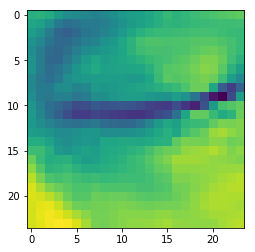

0


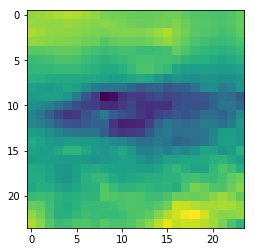

1


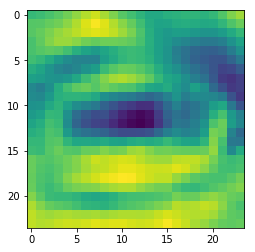

1


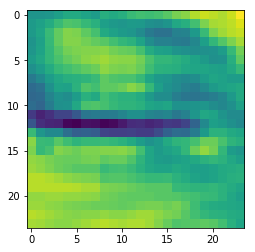

0


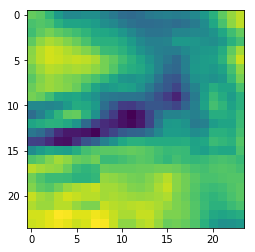

0


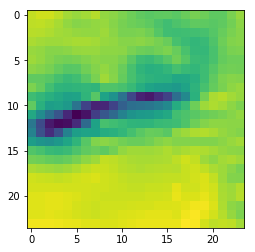

0


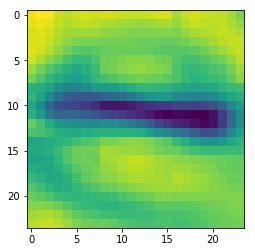

0


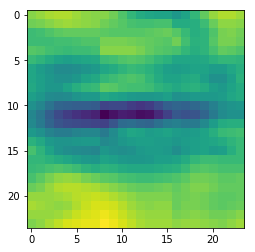

0


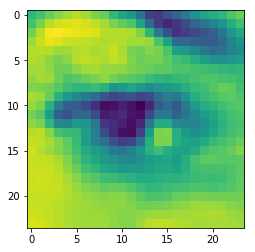

1


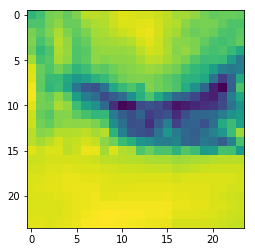

0


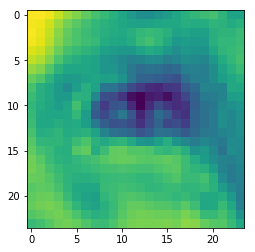

1


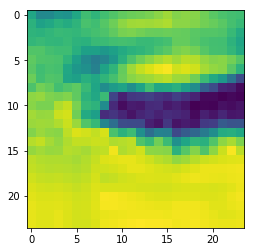

0


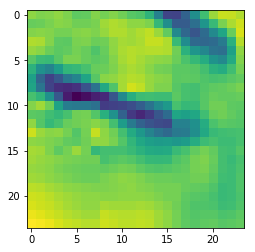

0


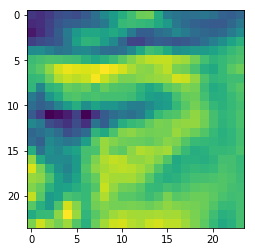

0


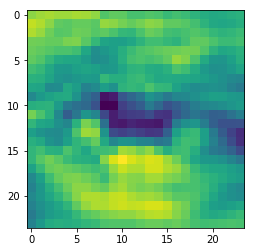

1


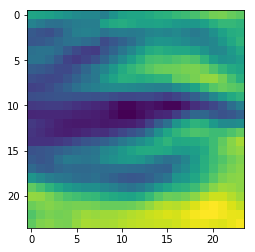

1


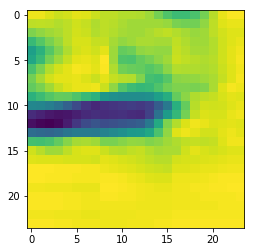

0


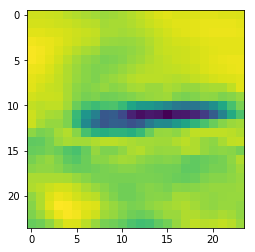

0


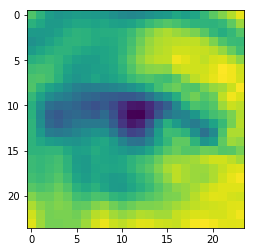

1


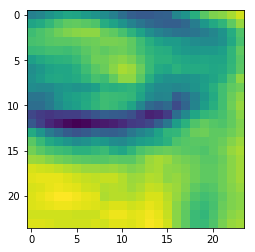

0


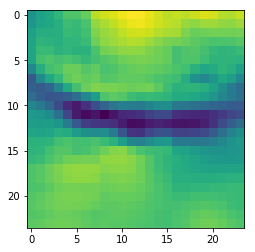

0


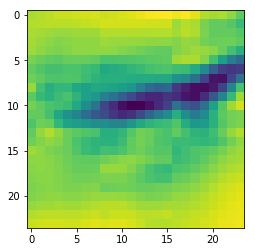

0


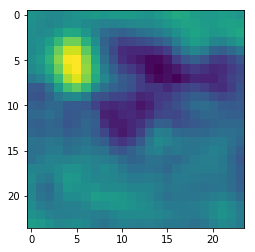

1


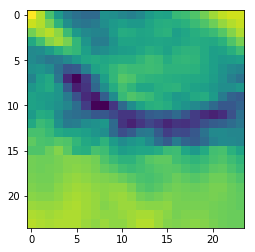

0


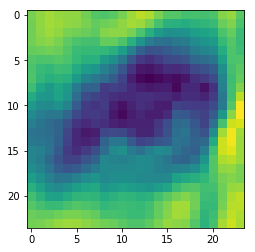

1


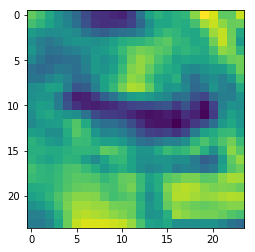

0


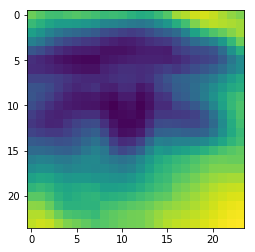

1


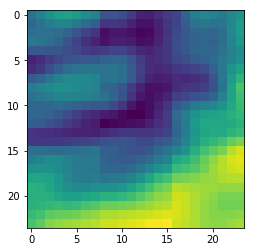

0


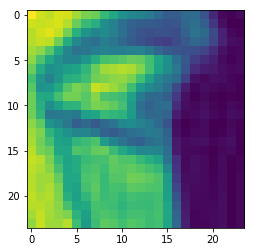

0


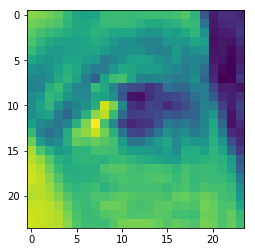

1


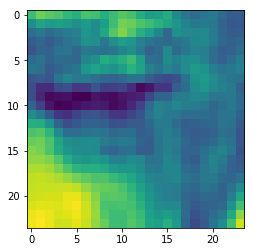

0


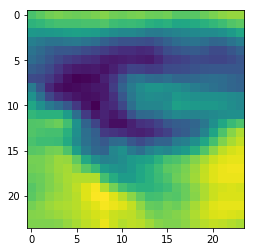

0


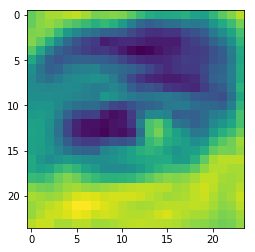

1


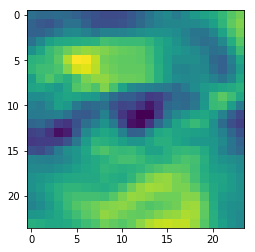

1


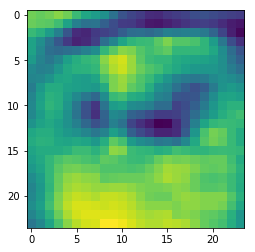

0


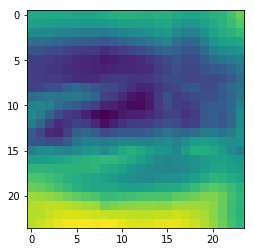

1


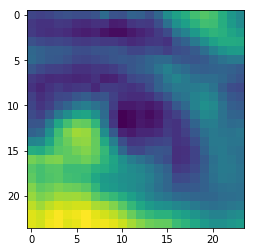

1


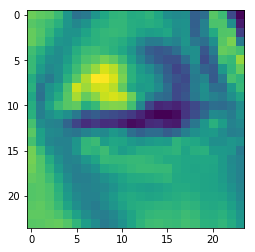

0


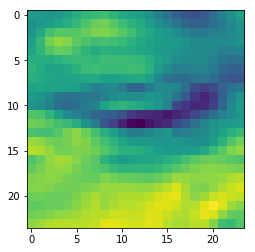

0


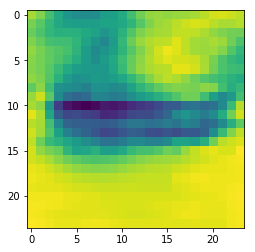

0


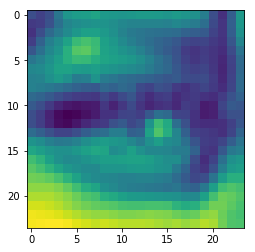

1


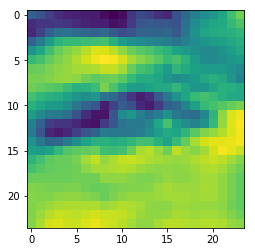

1


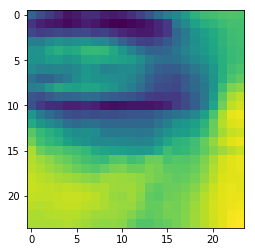

0


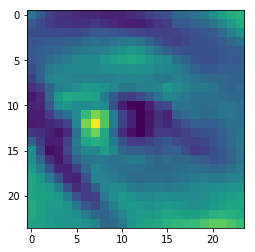

1


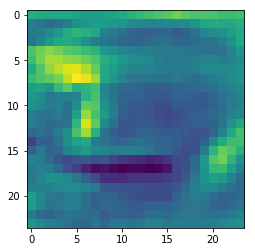

0


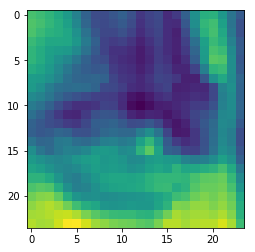

1


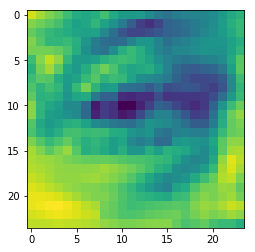

1


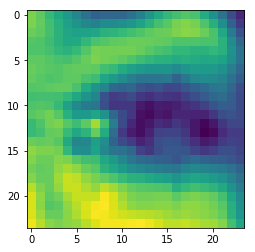

1


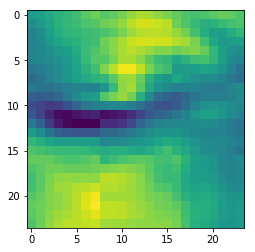

0


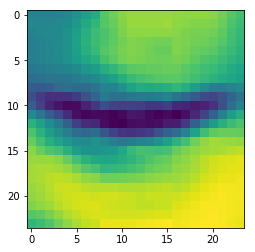

0


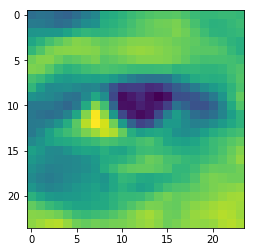

1


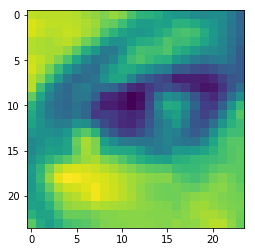

1


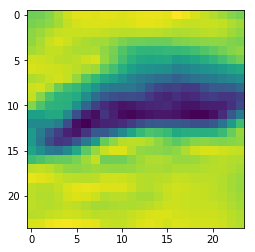

0


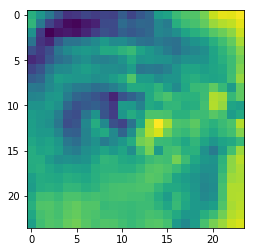

1


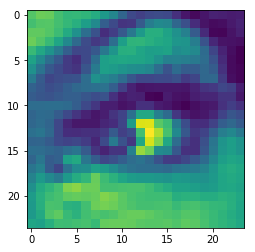

1


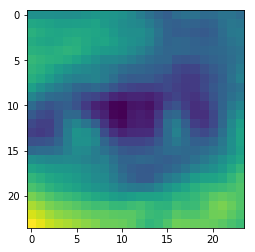

1


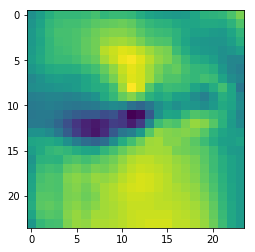

0


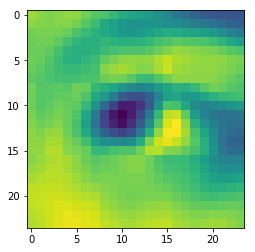

1


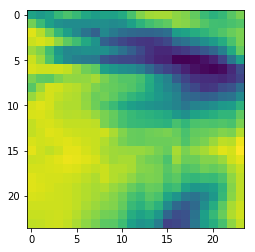

0


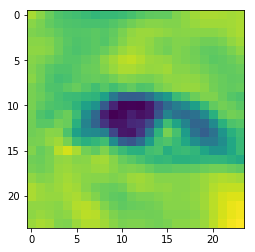

1


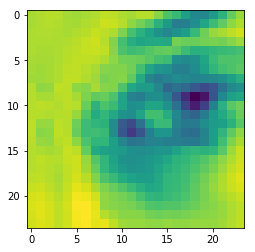

1


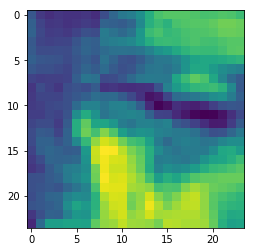

0


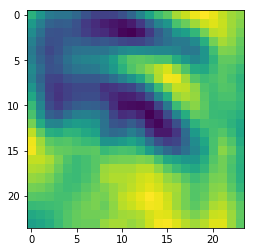

1


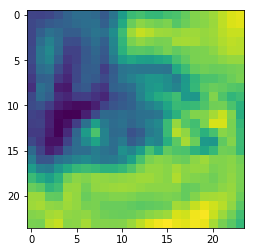

1


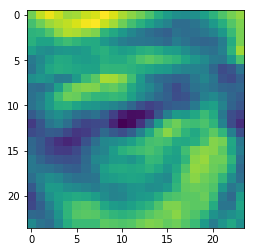

1


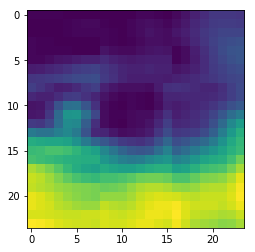

1


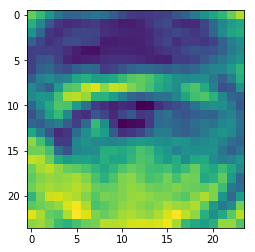

1


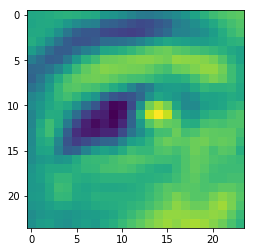

1


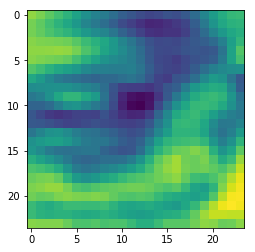

0


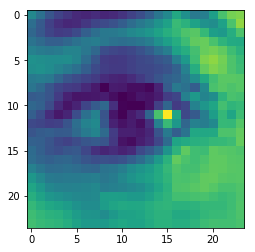

1


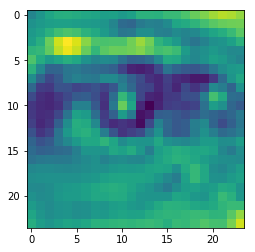

1


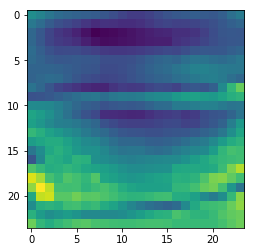

0


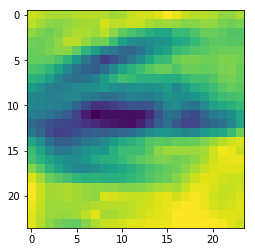

1


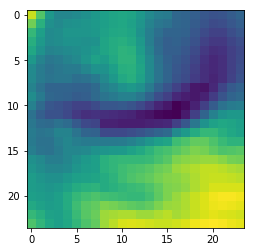

0


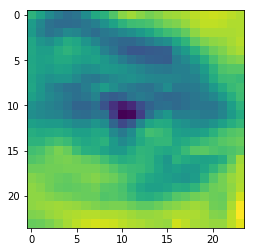

1


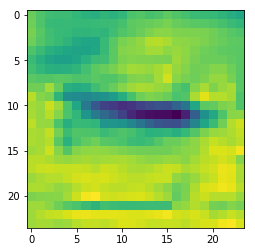

0


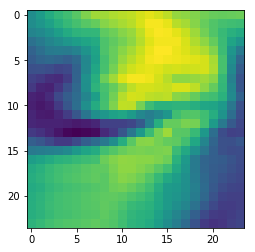

0


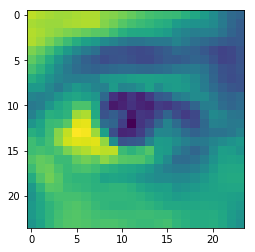

1


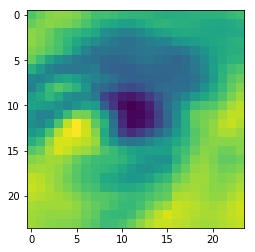

1


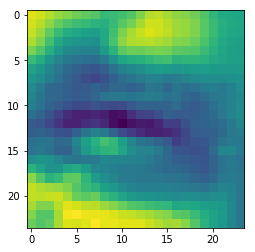

0


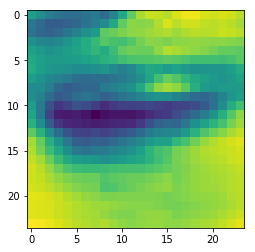

0


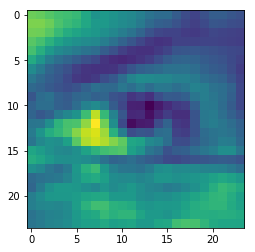

1


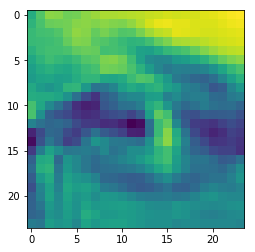

1


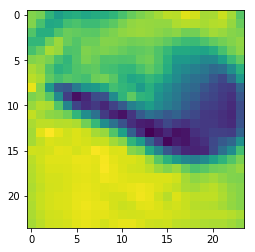

0


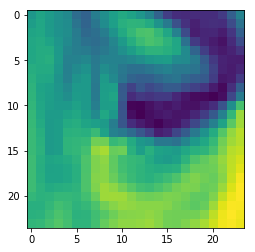

0


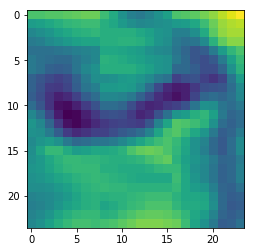

0


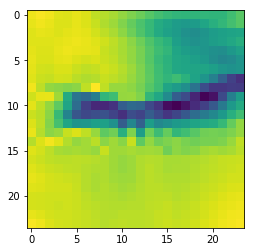

0


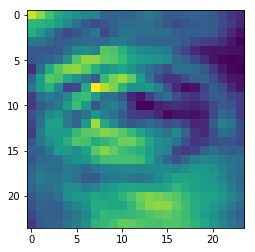

1


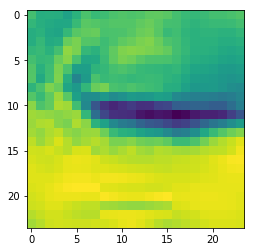

0


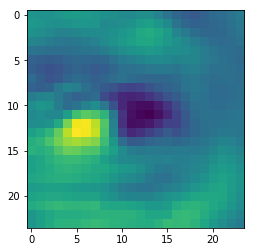

1


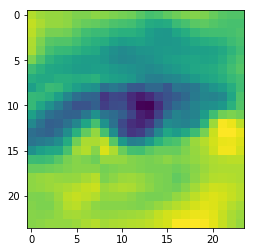

1


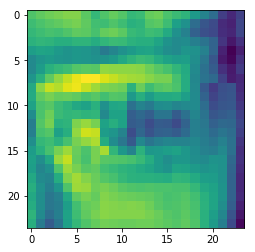

1


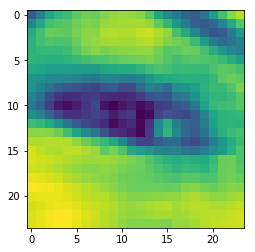

1


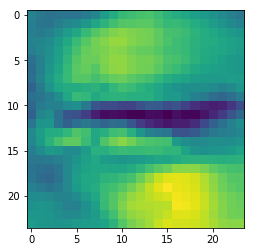

0


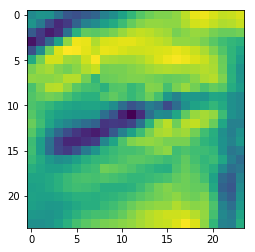

0


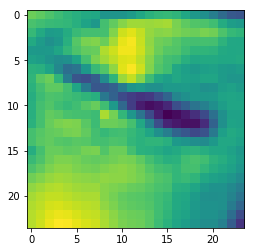

0


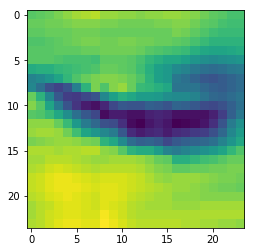

0


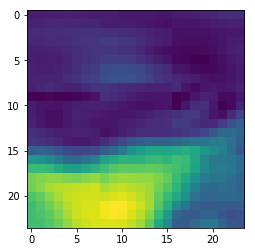

0


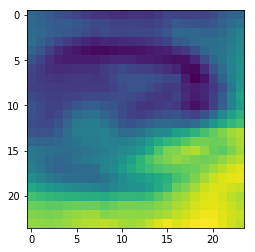

1


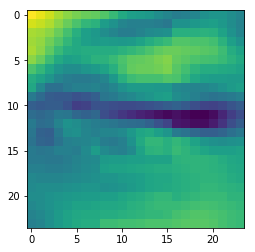

0


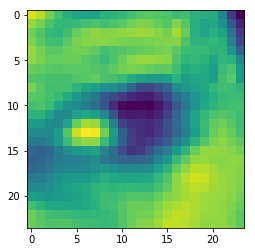

1


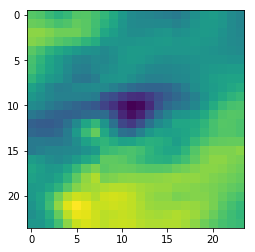

1


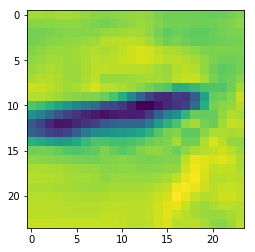

0


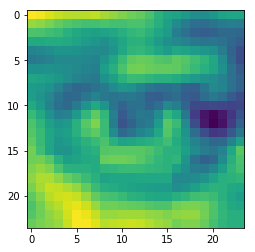

1


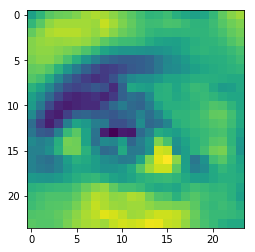

1


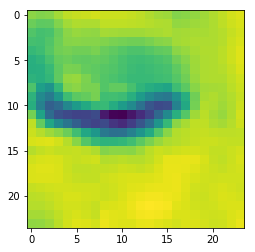

0


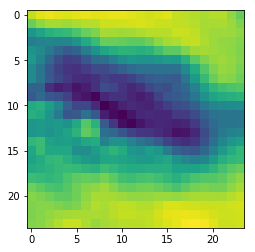

1


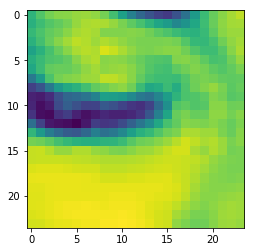

0


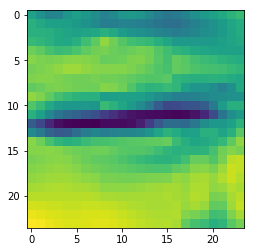

0


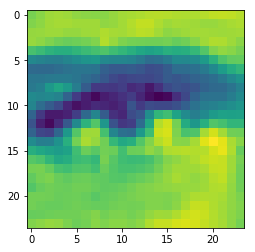

1


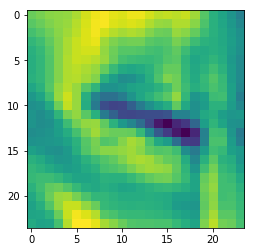

0


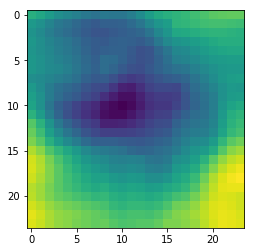

1


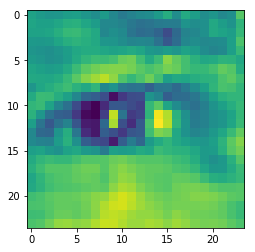

1


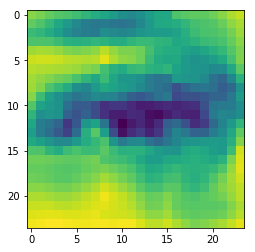

1


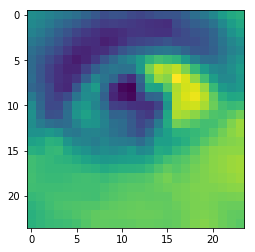

1


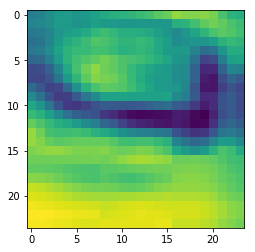

0


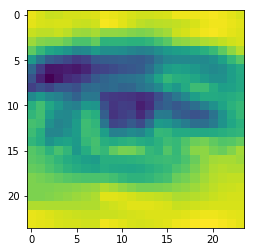

1


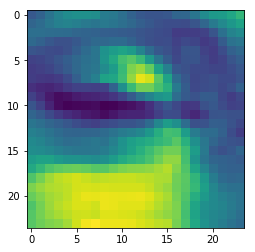

0


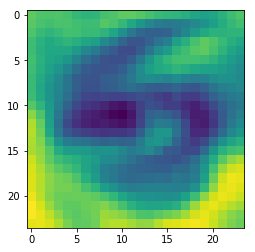

1


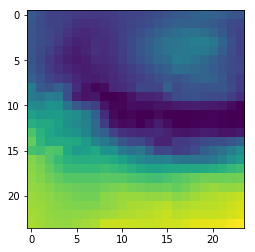

0


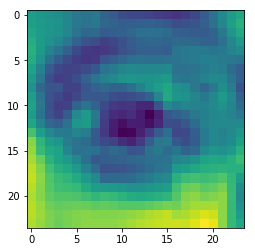

1


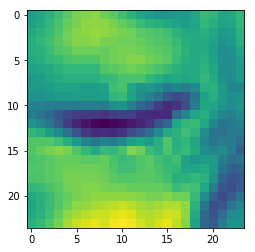

0


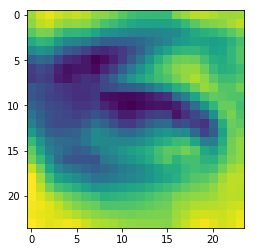

1


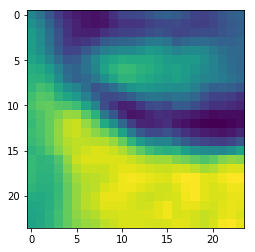

0


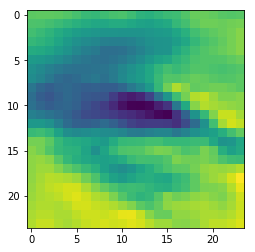

1


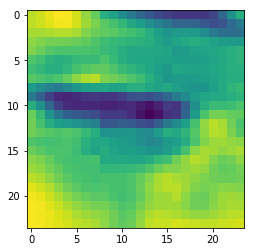

0


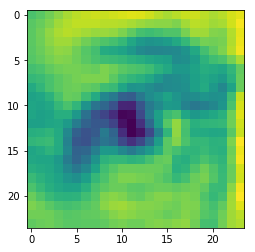

1


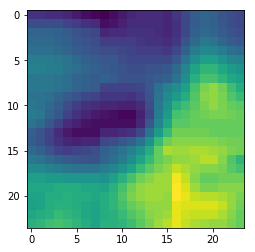

0


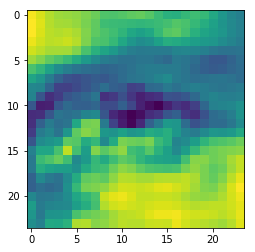

1


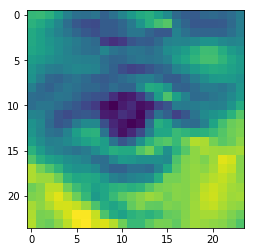

1


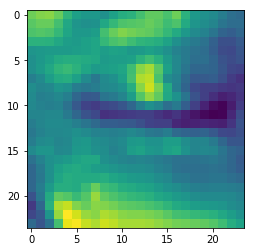

0


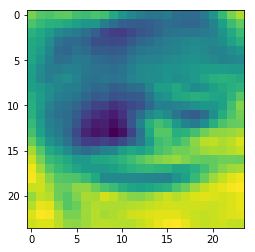

1


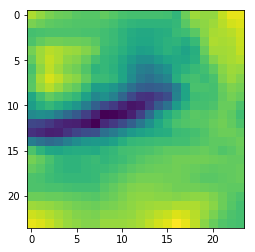

0


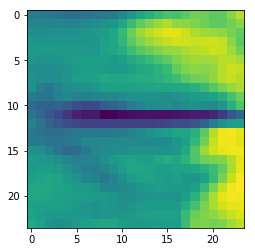

0


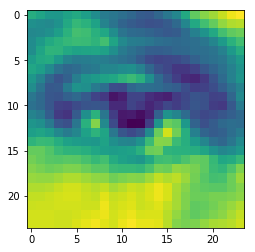

1


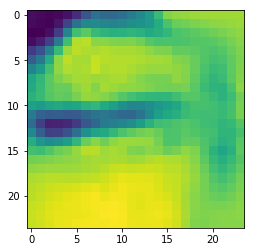

0


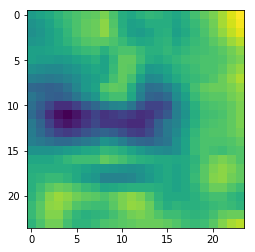

0


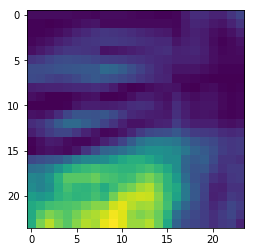

0


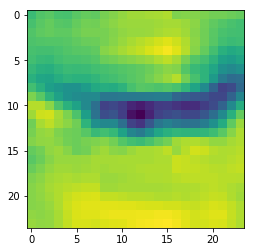

0


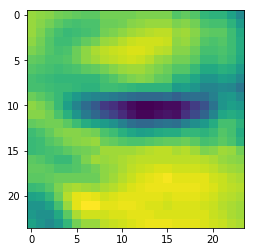

0


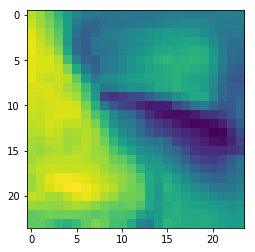

0


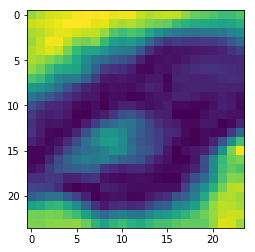

0


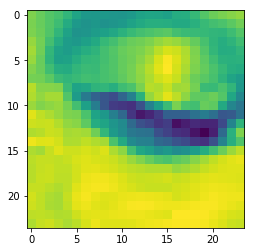

0


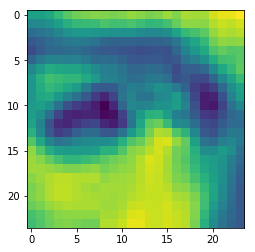

1


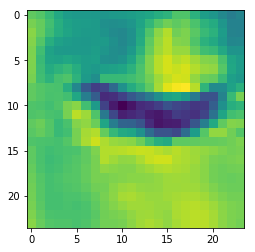

0


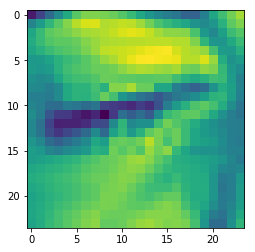

0


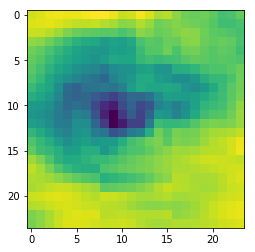

1


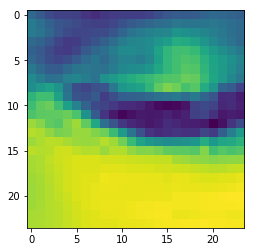

0


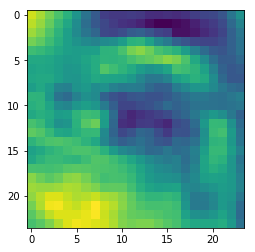

1


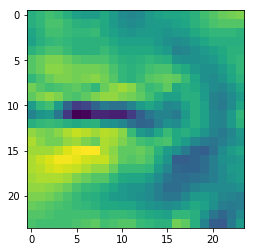

0


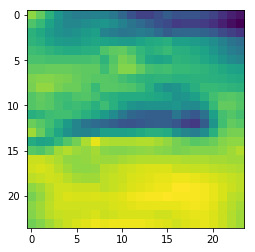

0


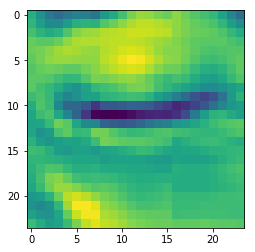

0


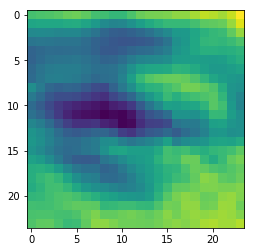

1


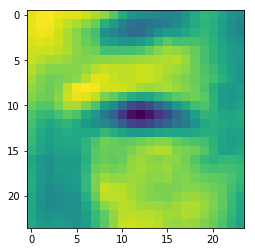

1


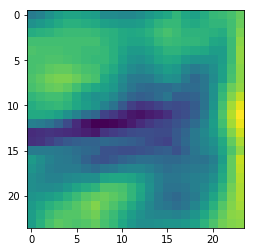

0


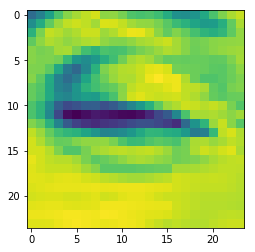

0


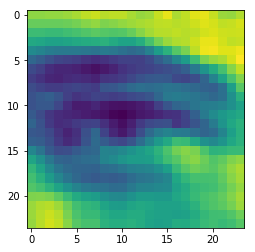

1


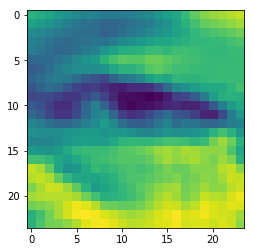

1


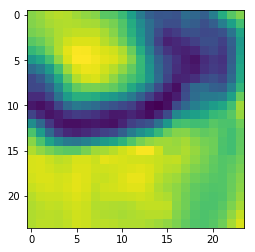

0


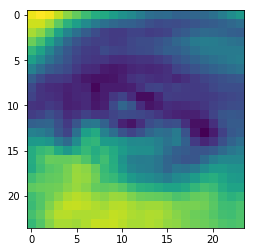

1


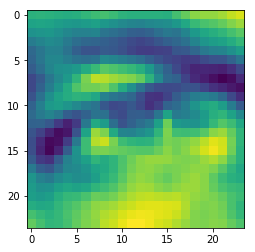

1


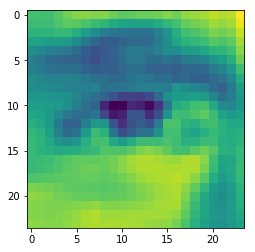

1


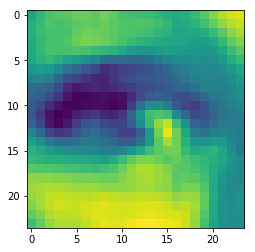

1


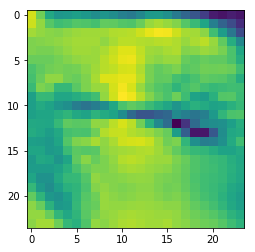

0


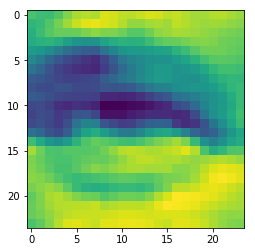

1


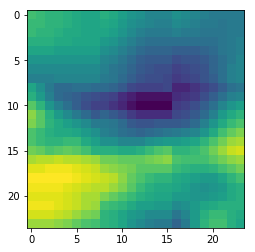

0


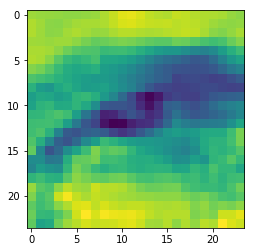

1


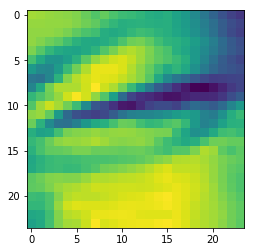

0


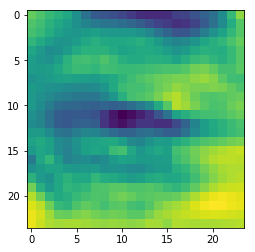

1


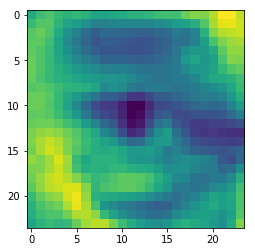

1


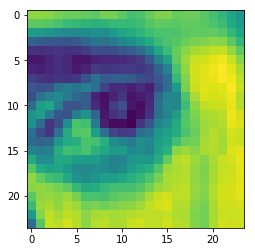

1


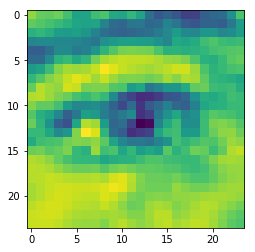

1


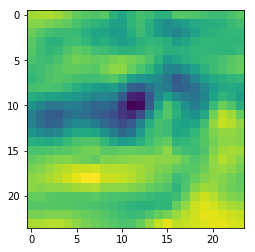

1


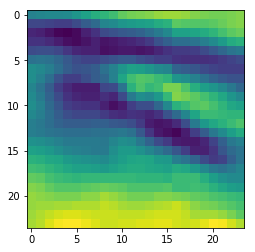

1


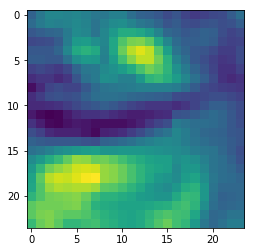

0


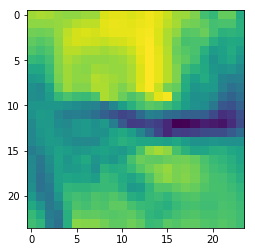

0


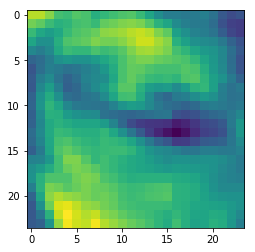

0


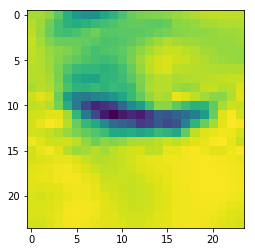

0


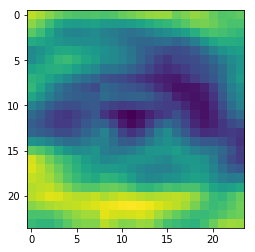

1


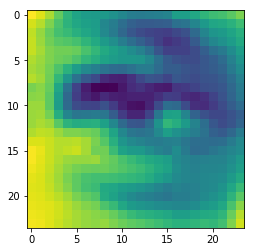

1


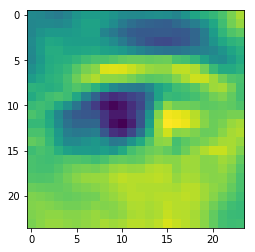

1


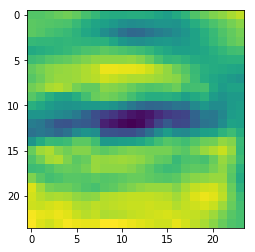

1


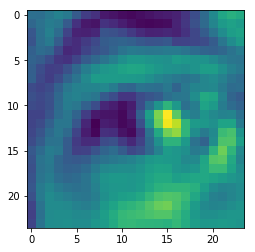

1


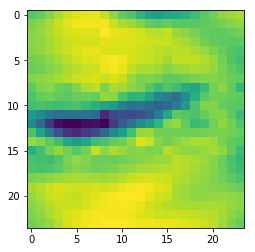

0


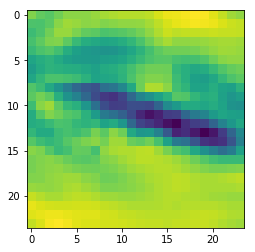

0


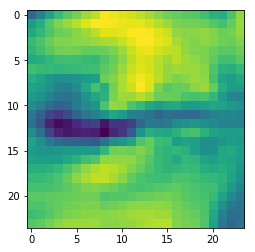

0


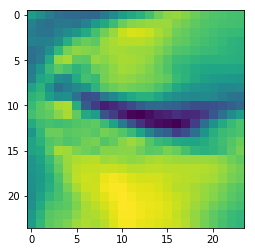

0


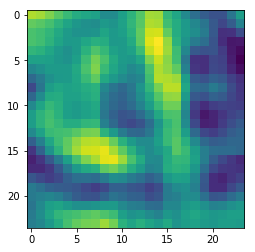

0


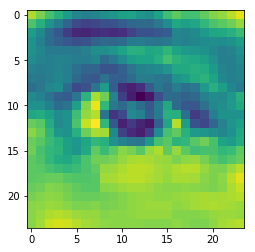

1


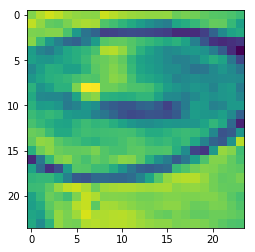

0


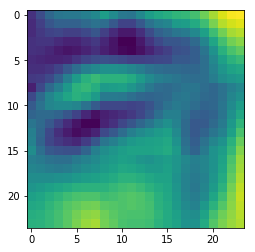

1


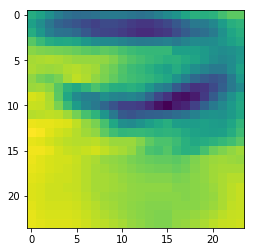

0


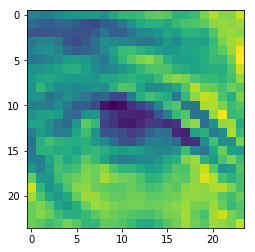

1


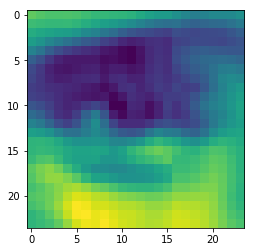

1


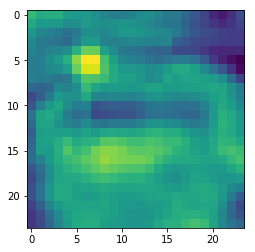

1


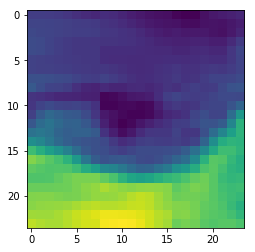

1


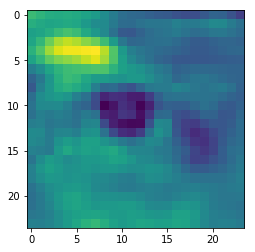

1


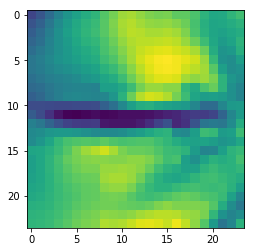

0


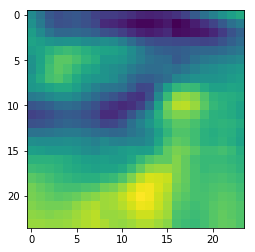

0


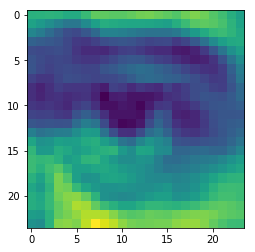

1


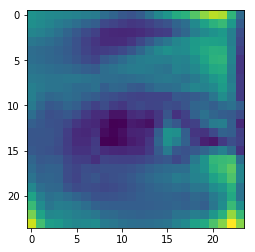

1


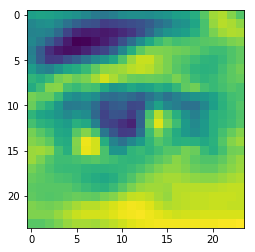

1


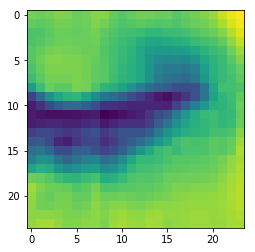

0


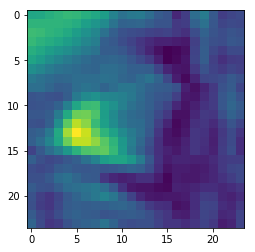

0


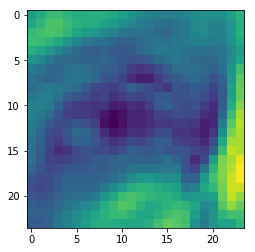

1


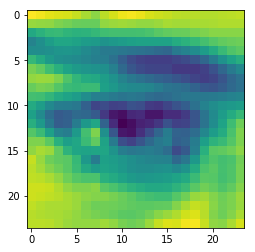

1


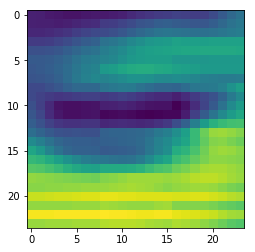

0


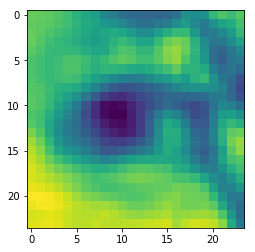

1


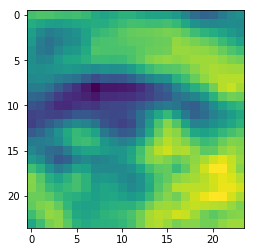

1


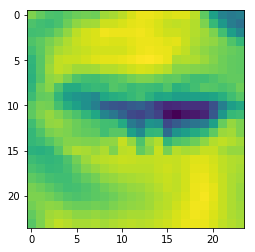

0


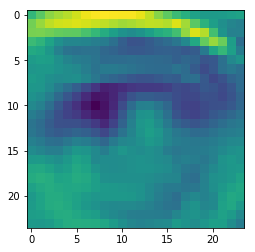

1


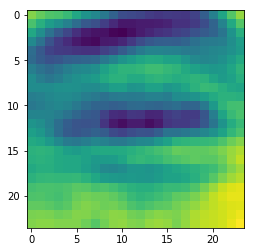

1


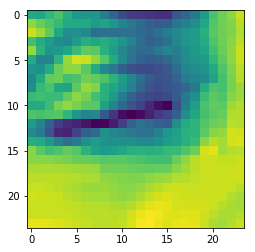

0


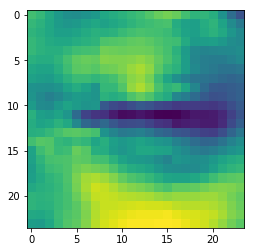

0


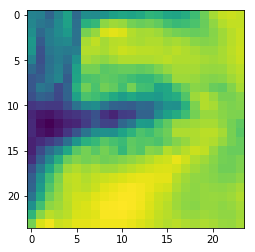

0


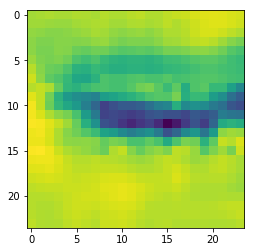

0


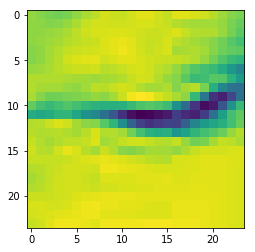

0


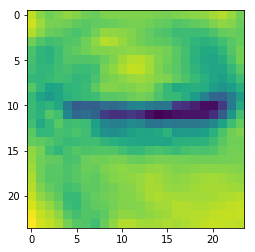

0


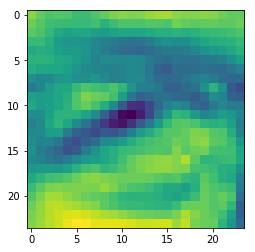

1


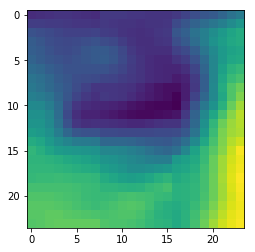

0


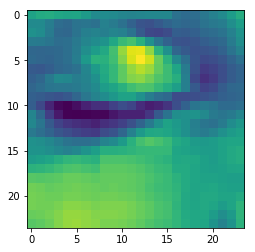

0


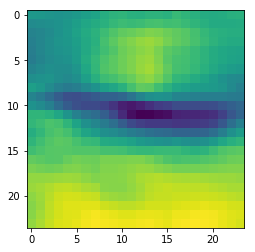

0


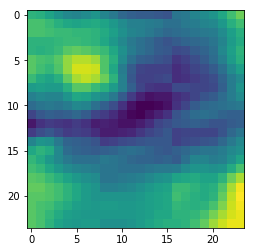

0


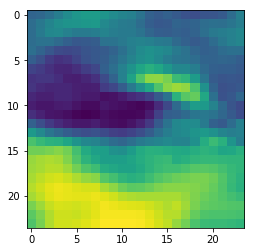

1


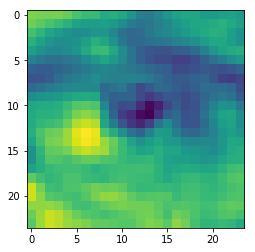

1


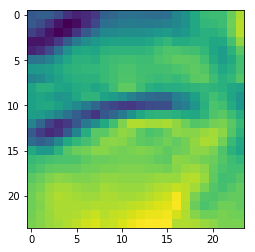

0


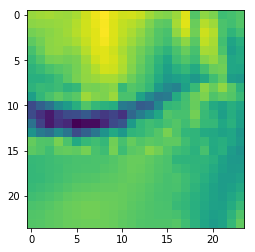

0


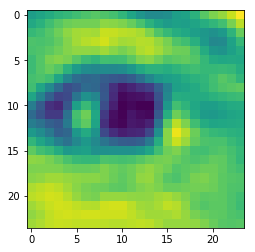

1


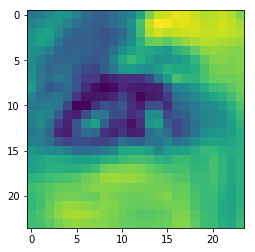

1


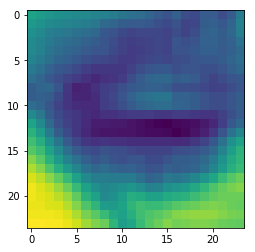

0


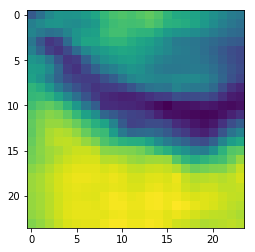

0


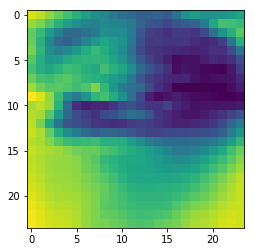

0


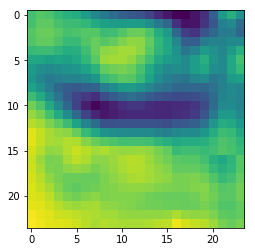

0


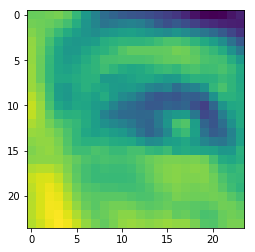

1


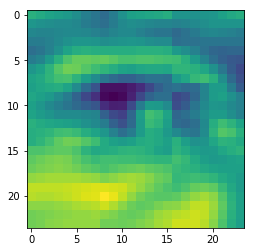

1


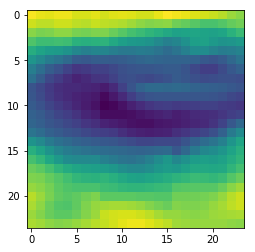

0


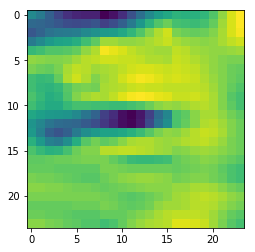

0


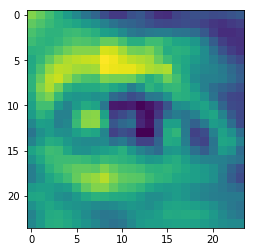

1


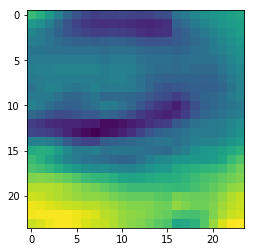

0


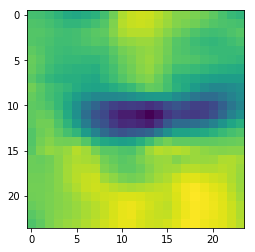

0


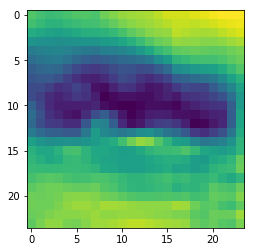

1


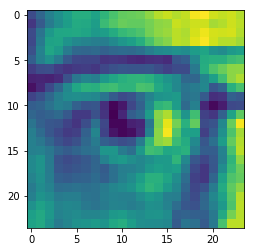

1


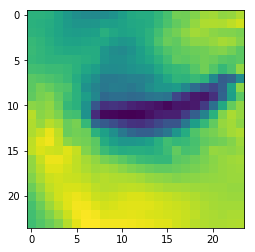

0


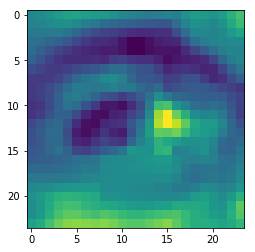

1


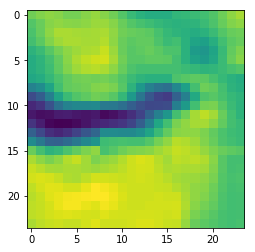

0


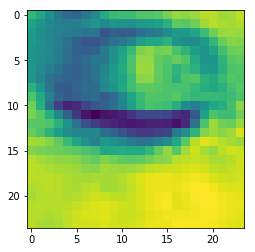

0


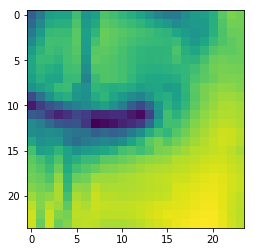

0


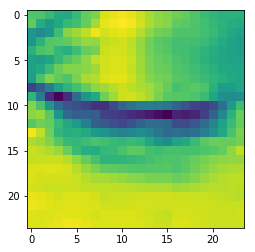

0


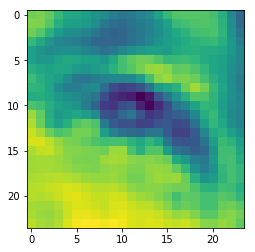

1


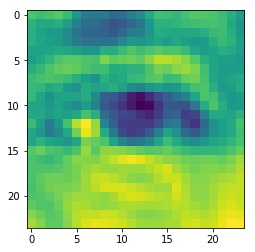

1


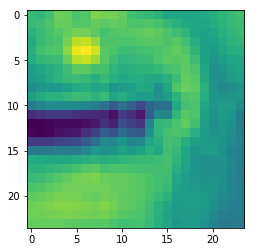

0


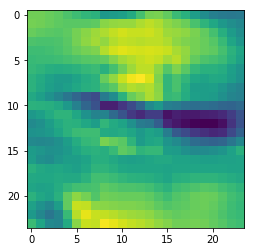

0


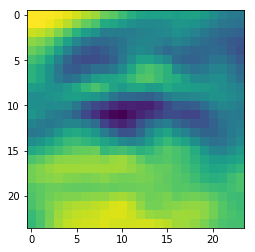

1


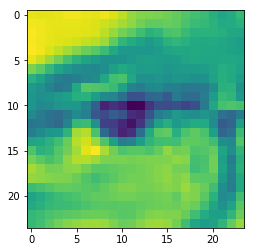

1


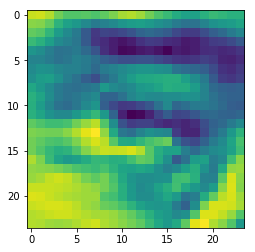

1


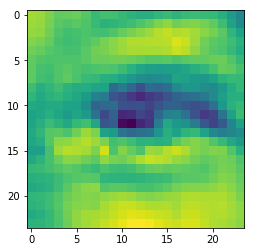

1


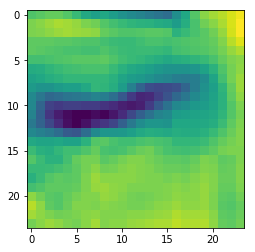

0


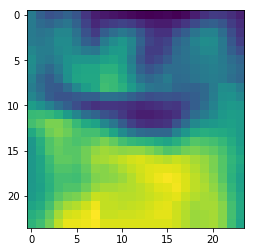

0


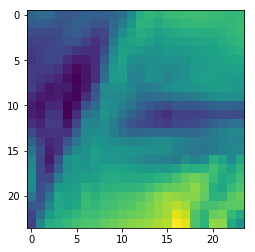

0


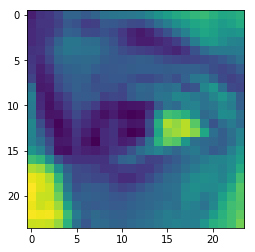

1


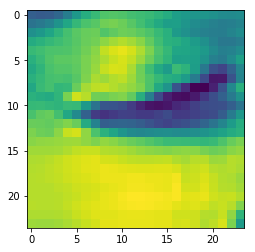

0


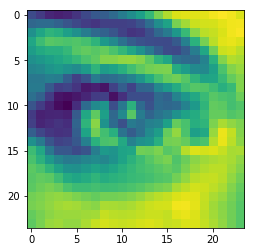

1


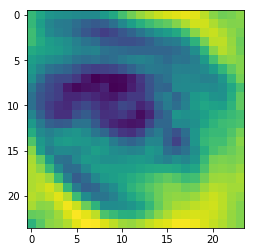

1


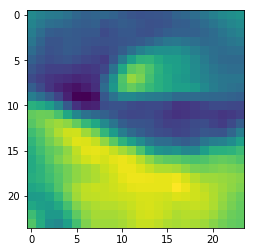

0


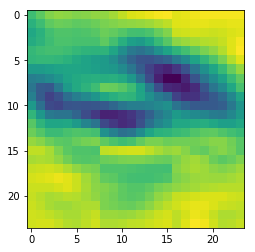

1


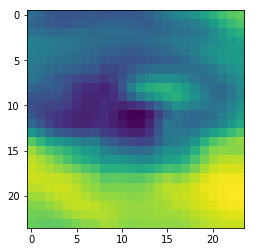

1


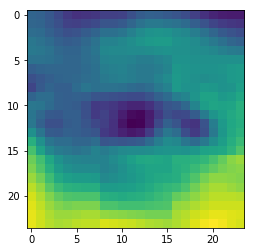

1


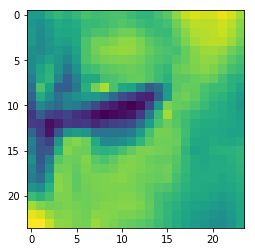

0


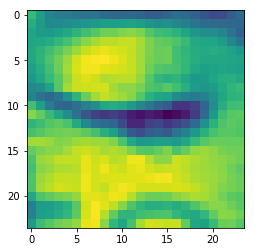

0


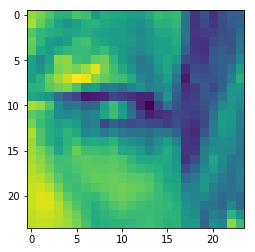

0


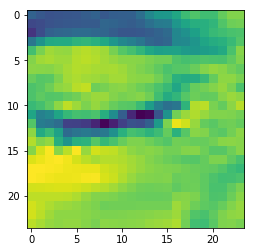

0


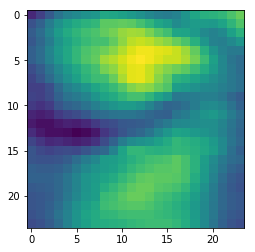

0


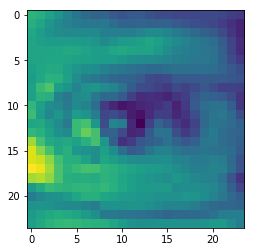

1


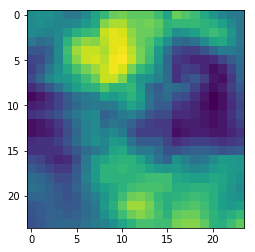

0


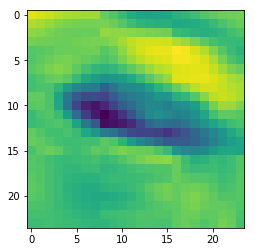

0


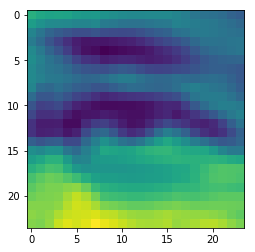

1


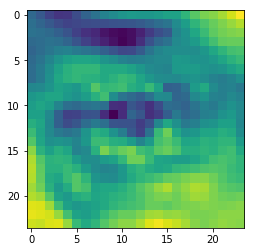

1


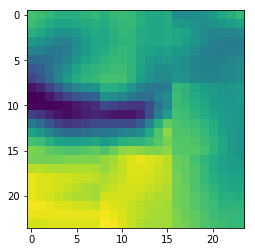

0


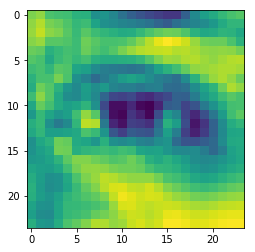

1


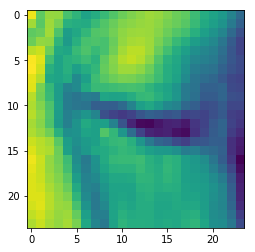

0


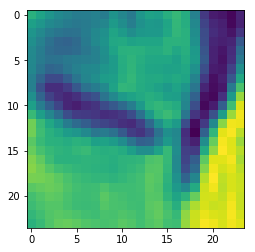

0


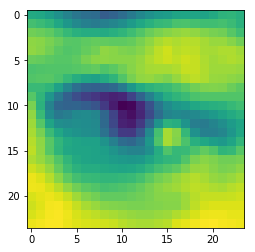

1


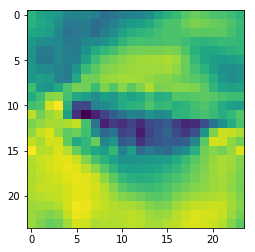

0


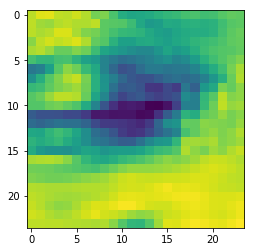

0


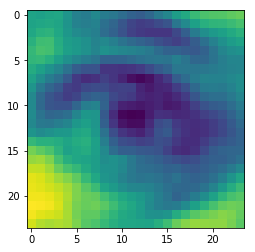

1


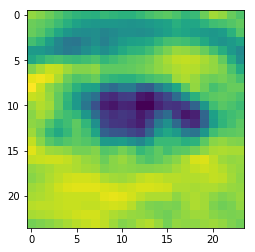

1


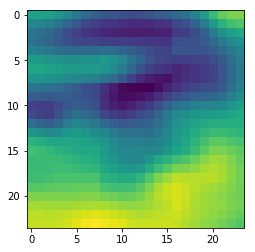

1


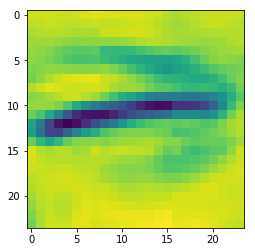

0


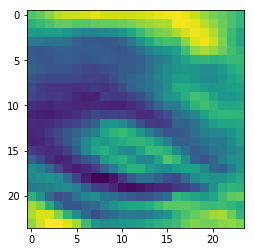

0


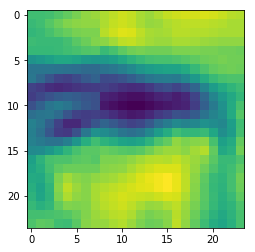

1


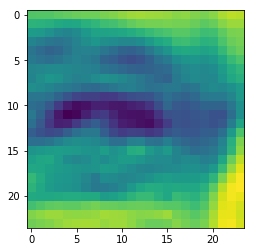

1


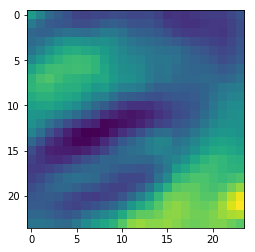

1


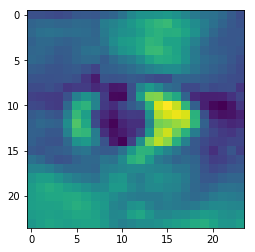

1


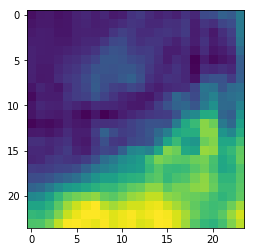

0


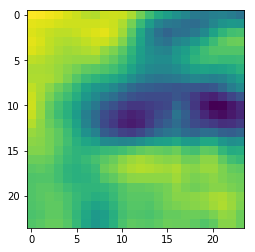

1


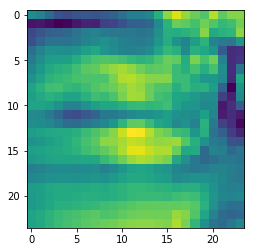

0


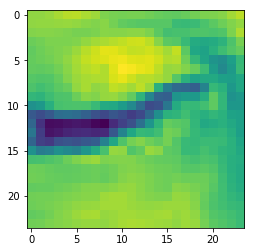

0


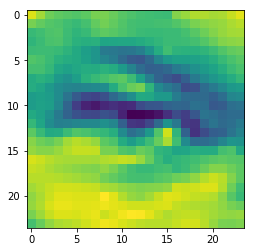

1


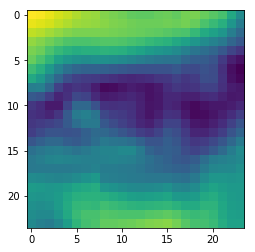

1


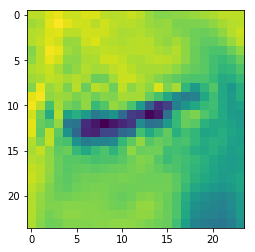

0


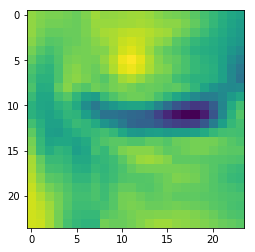

0


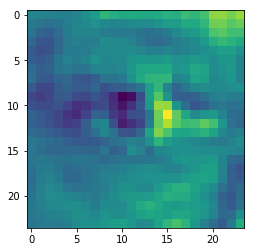

1


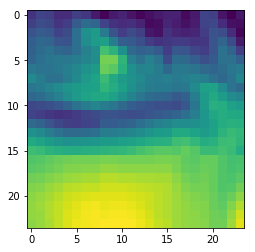

0


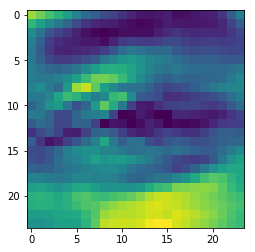

1


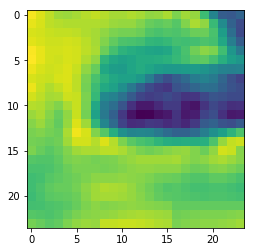

0


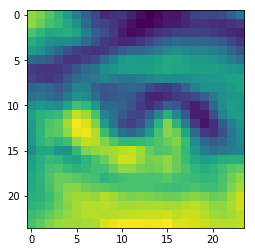

1


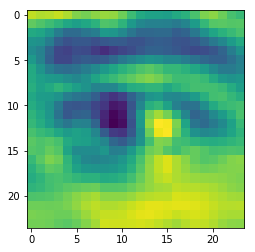

1


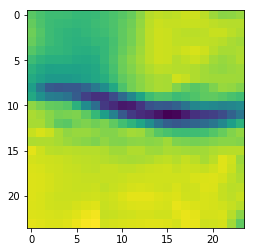

0


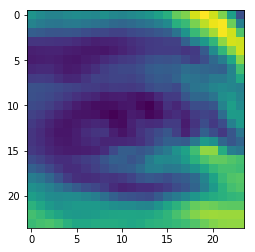

1


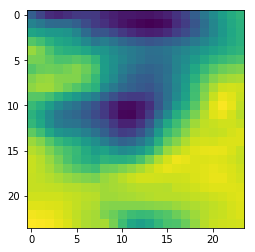

0


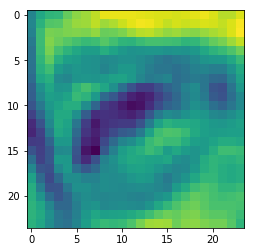

1


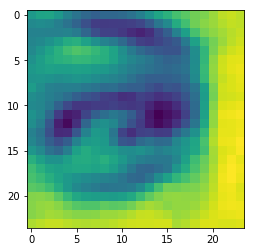

1


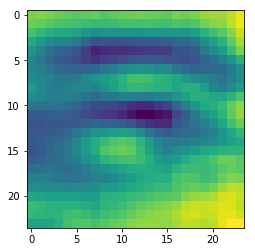

0


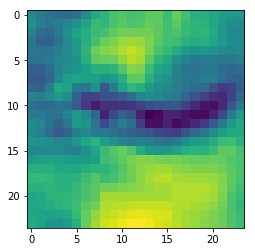

0


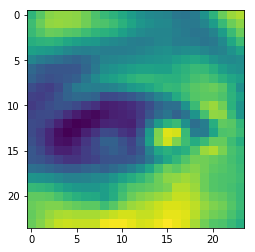

1


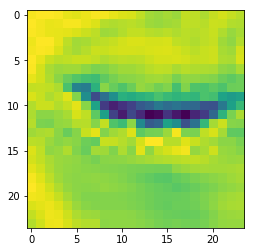

0


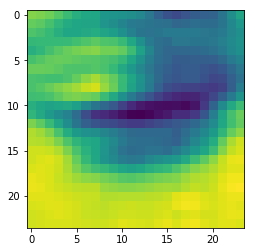

0


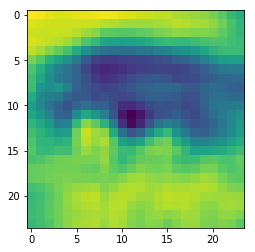

1


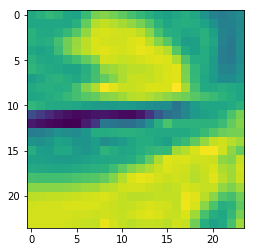

0


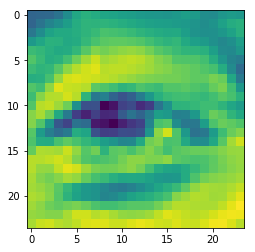

1


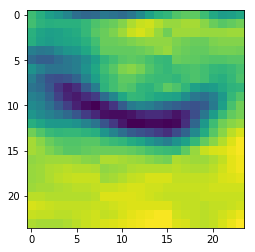

0


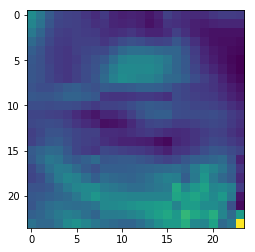

0


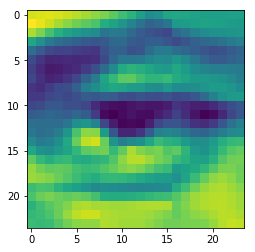

1


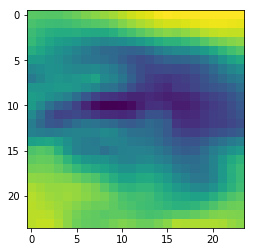

1


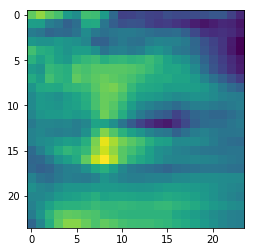

0


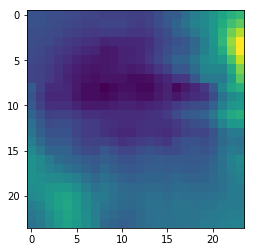

0


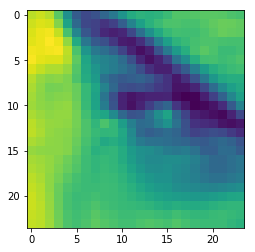

1


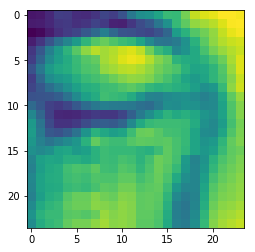

0


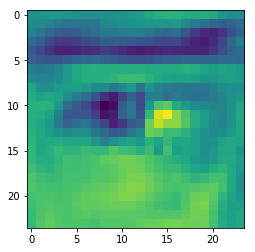

1


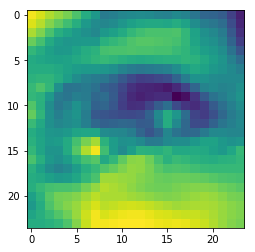

1


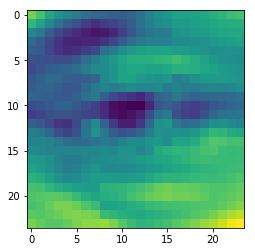

1


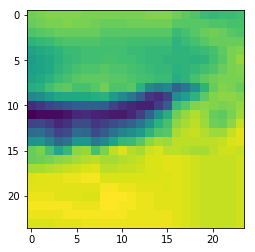

0


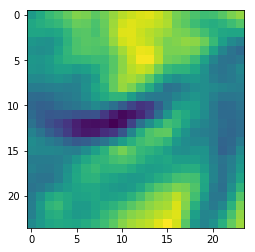

0


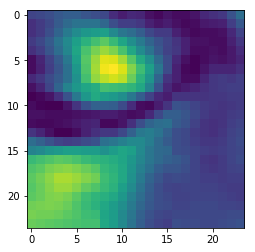

0


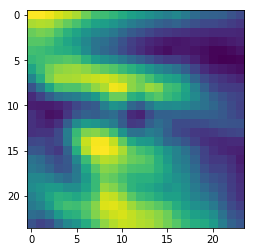

1


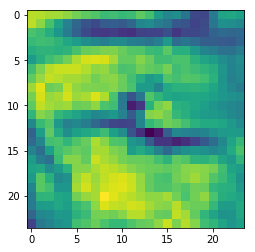

0


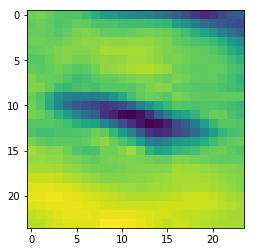

0


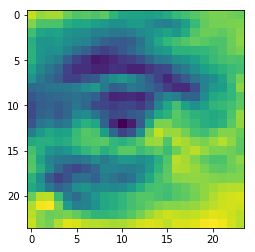

1


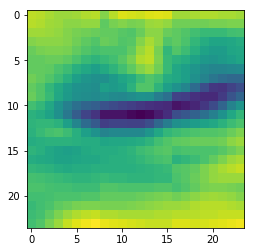

0


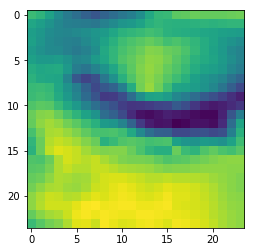

0


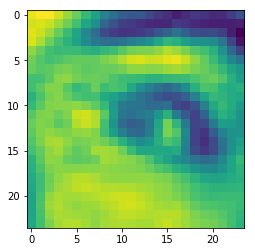

1


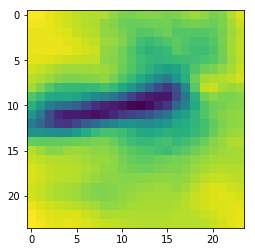

0


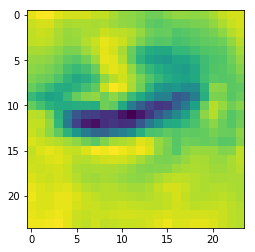

0


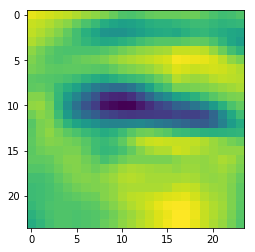

1


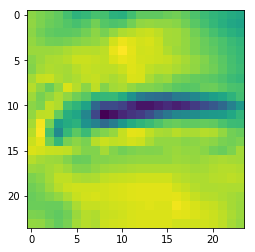

0


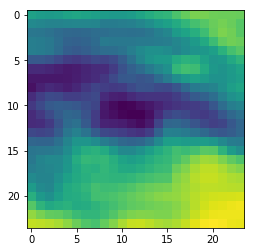

1


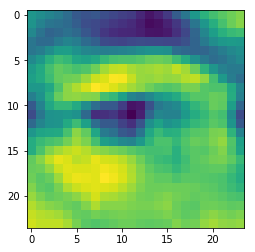

1


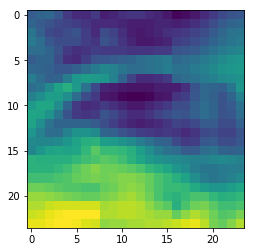

1


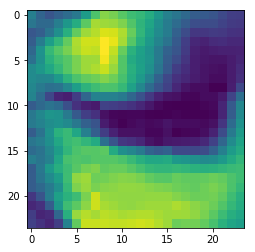

0


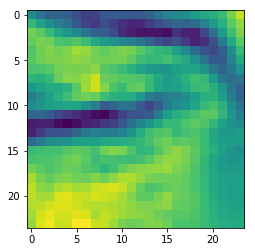

0


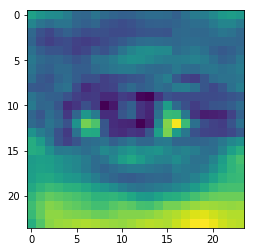

1


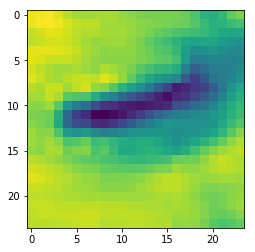

0


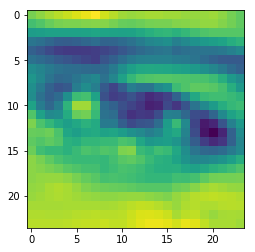

1


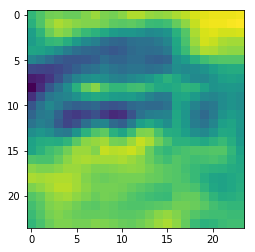

1


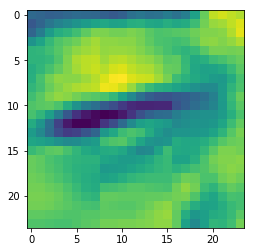

0


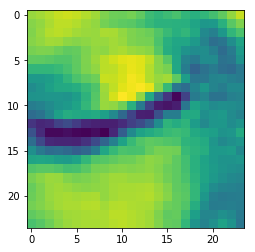

0


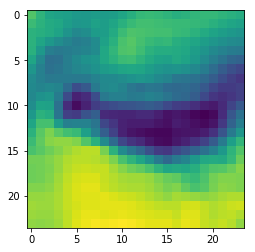

0


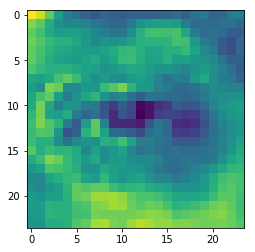

1


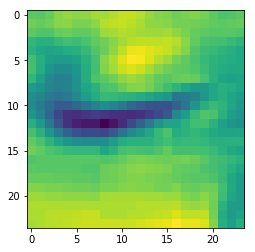

0


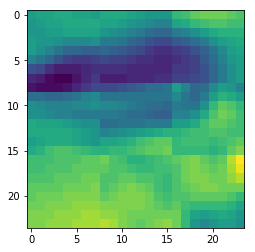

0


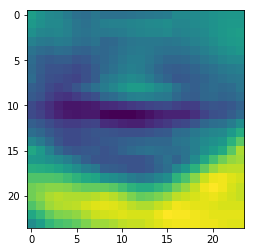

0


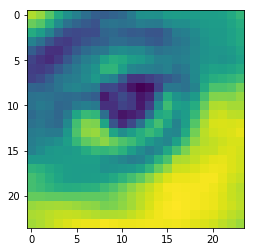

1


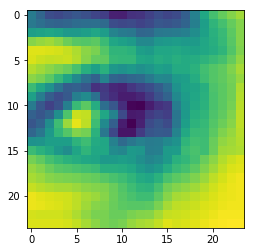

1


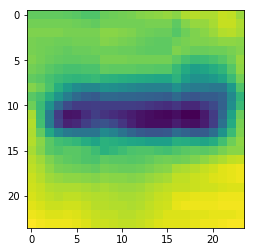

0


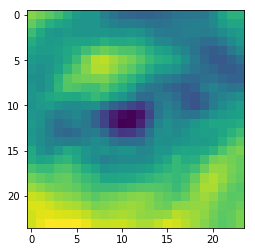

1


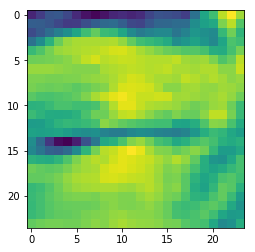

0


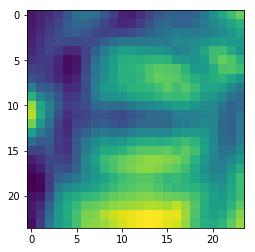

0


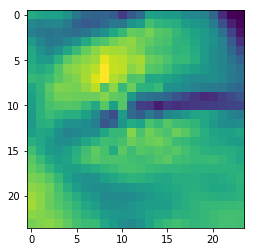

0


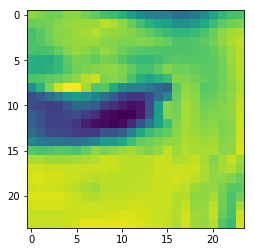

0


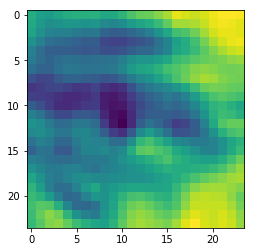

1


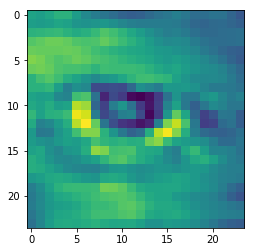

1


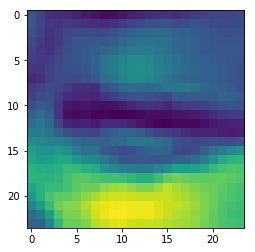

0


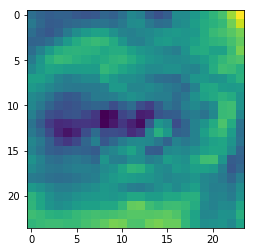

1


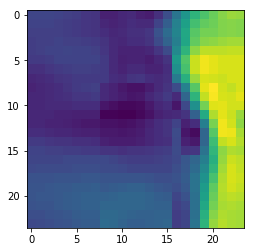

0


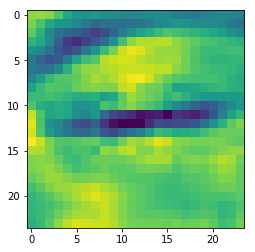

0


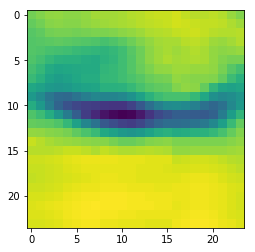

0


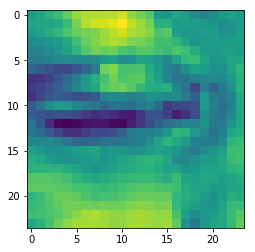

0


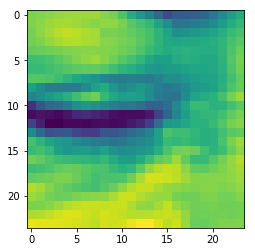

0


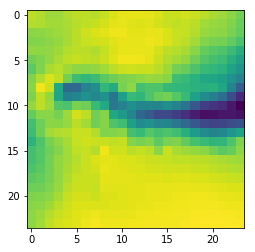

0


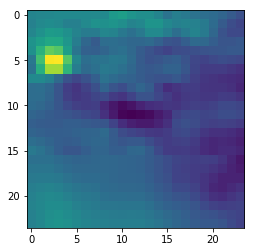

0


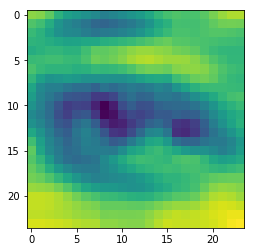

1


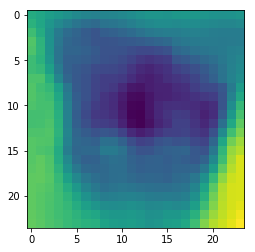

1


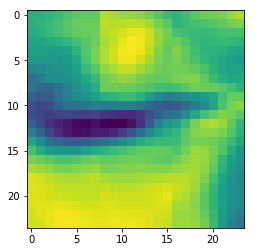

0


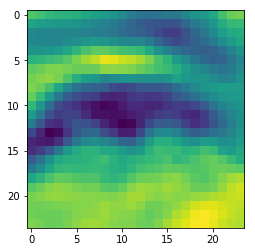

1


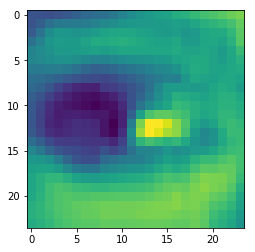

1


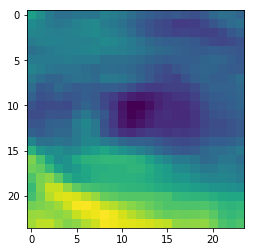

1


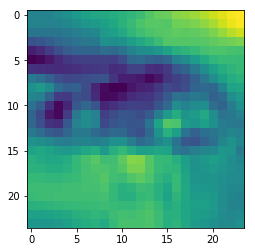

1


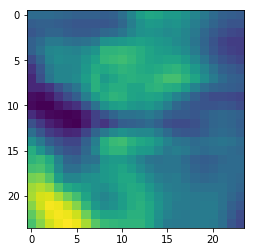

0


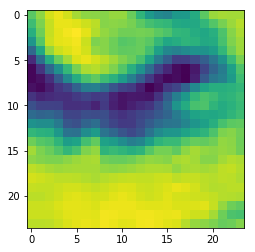

0


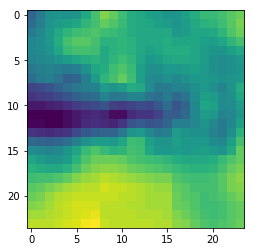

0


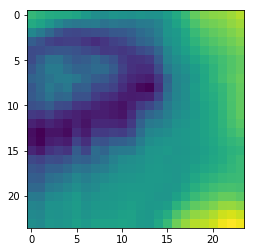

0


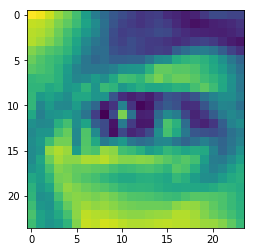

1


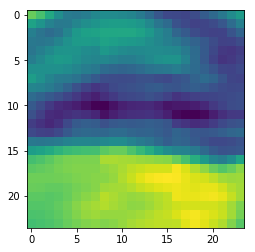

0


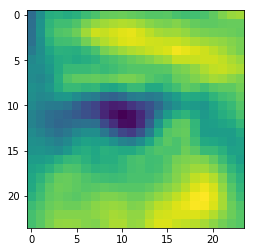

1


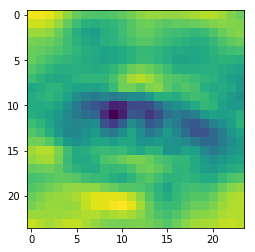

1


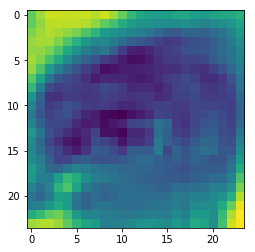

1


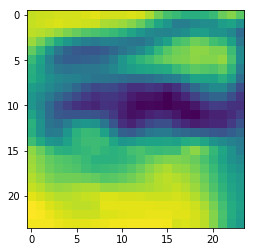

1


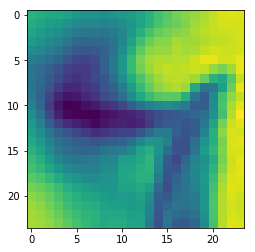

0


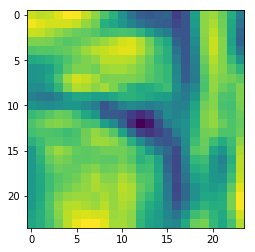

0


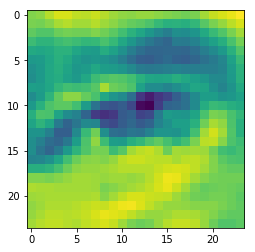

1


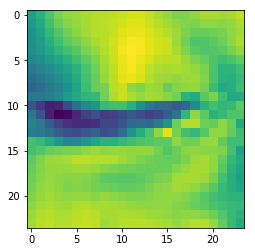

0


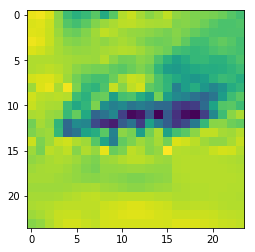

0


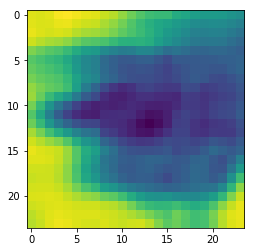

0


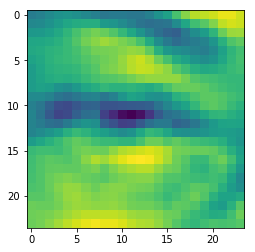

1


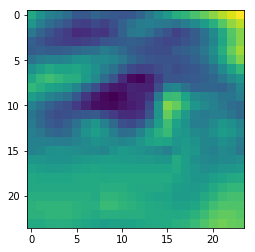

1


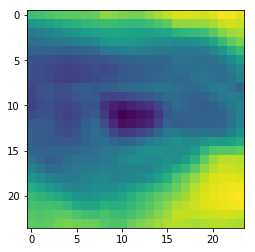

1


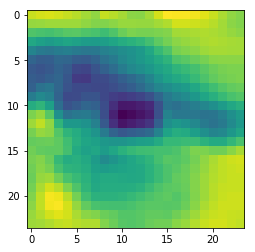

1


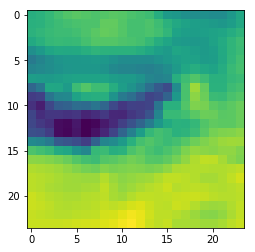

0


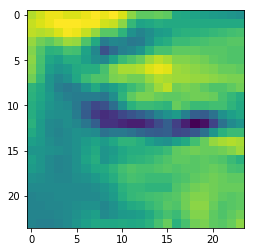

0


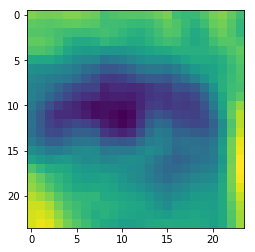

1


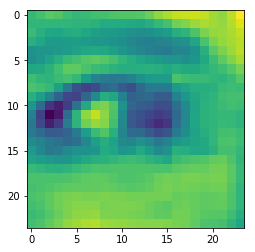

1


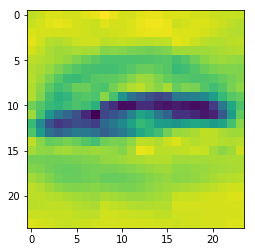

0


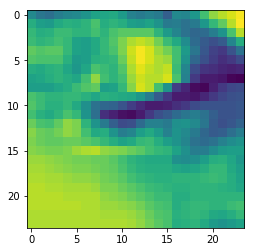

0


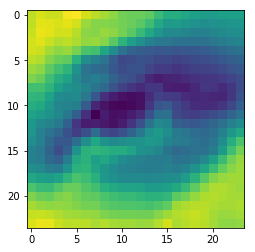

1


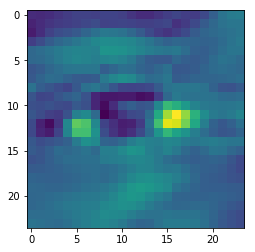

1


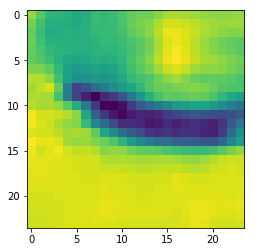

0


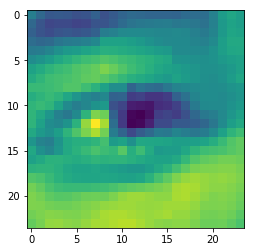

1


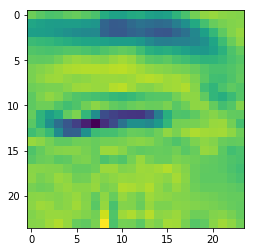

0


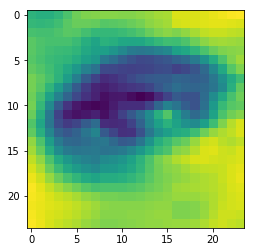

1


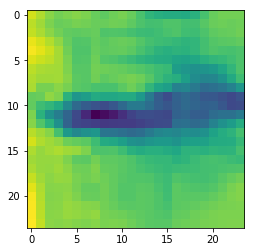

0


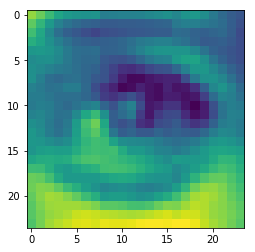

1


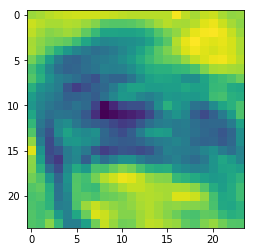

1


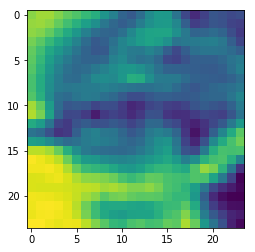

0


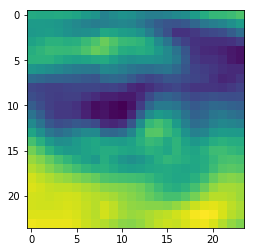

1


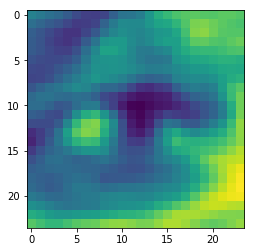

1


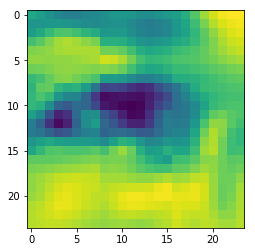

1


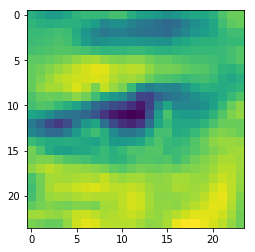

1


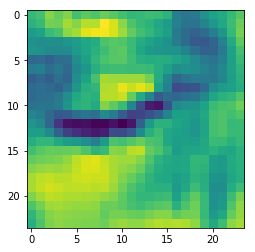

0


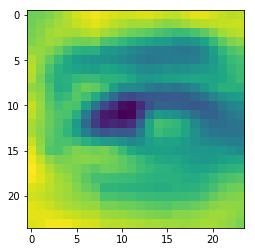

1


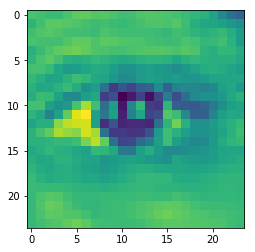

1


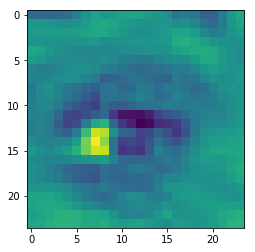

1


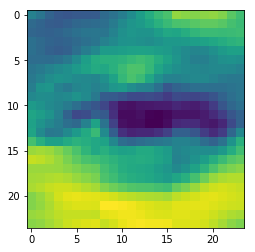

1


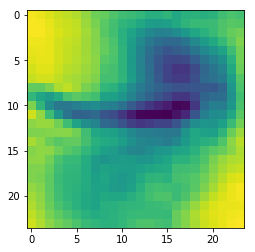

0


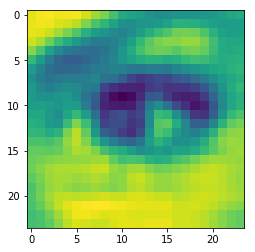

1


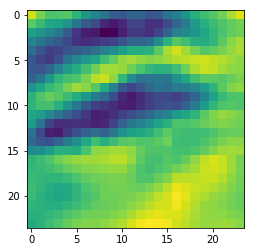

1


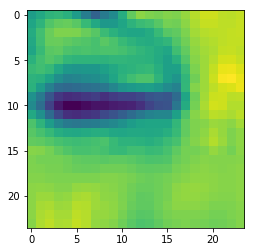

0


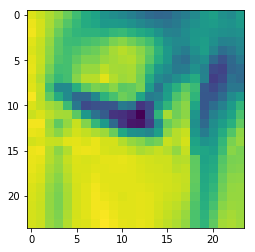

0


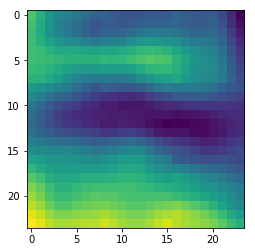

1


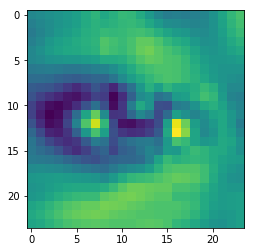

1


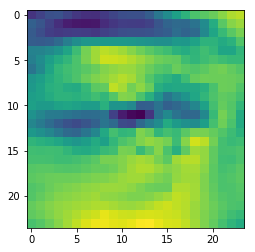

0


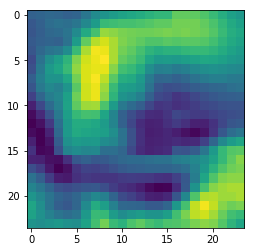

0


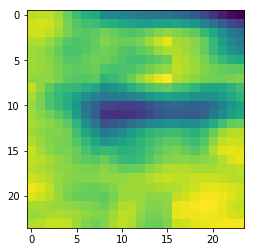

0


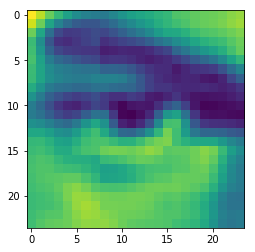

1


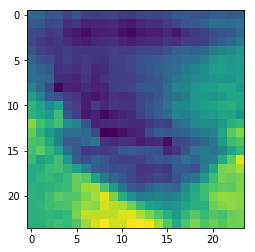

0


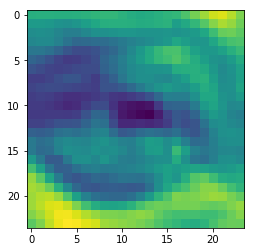

1


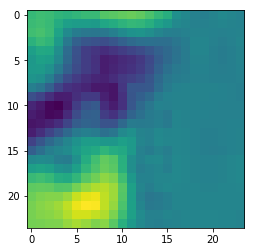

1


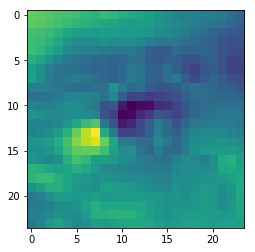

1


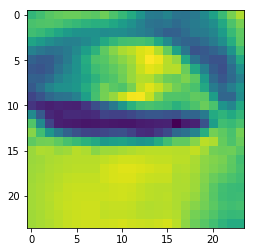

0


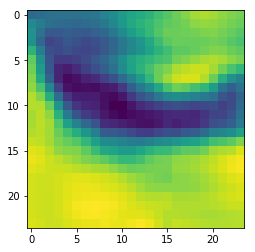

0


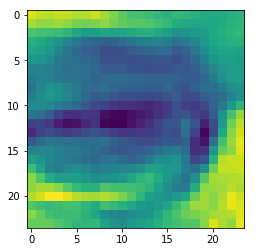

0


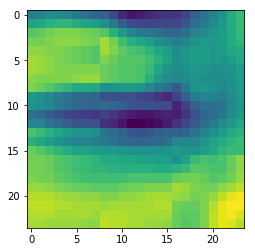

0


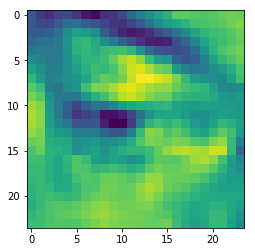

1


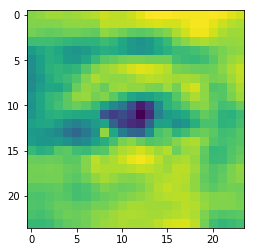

1


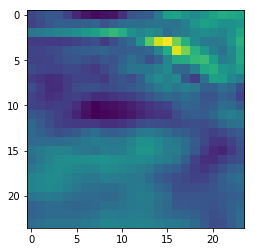

0


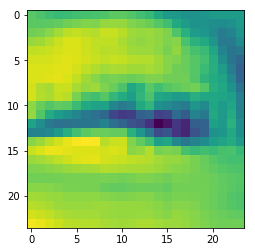

0


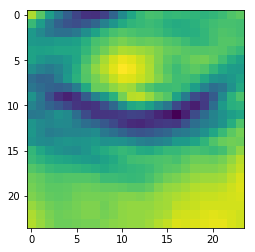

0


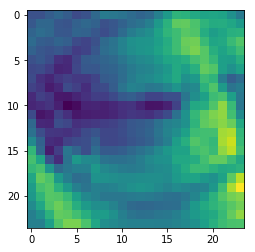

0


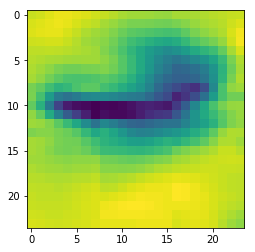

0


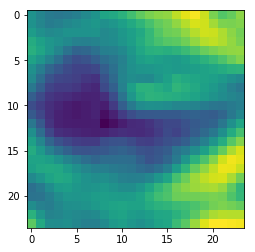

0


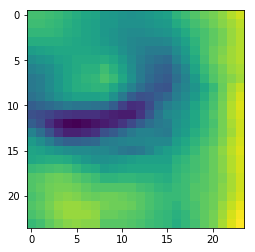

0


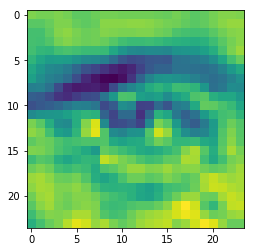

1


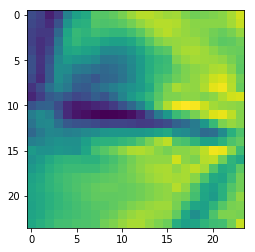

0


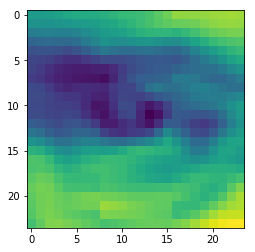

1


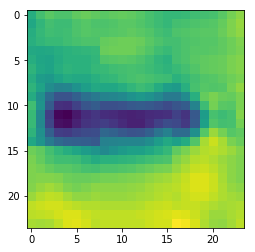

0


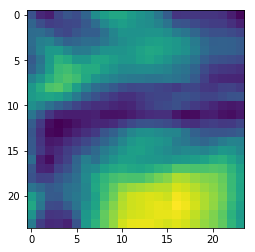

0


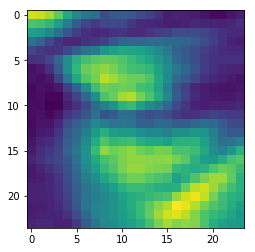

0


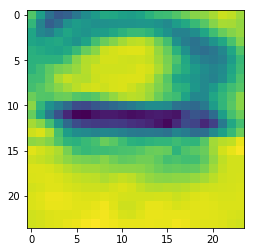

0


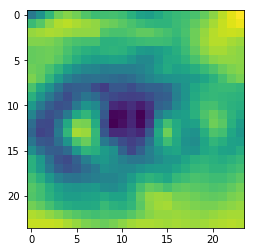

1


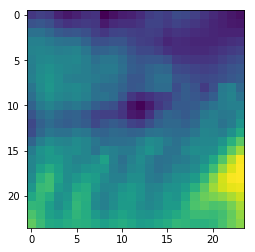

0


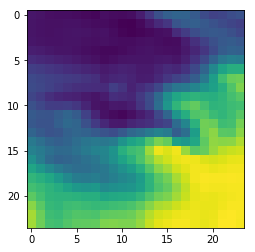

1


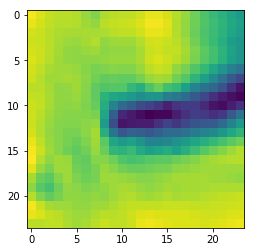

0


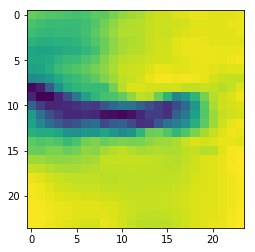

0


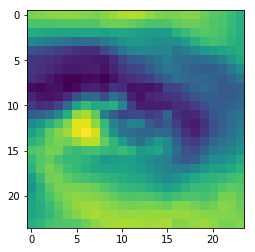

1


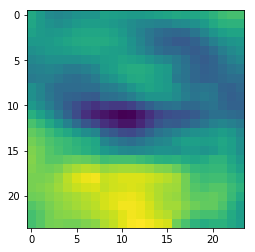

0


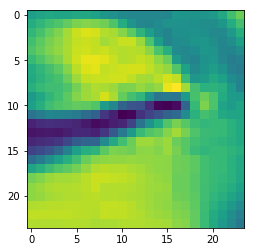

0


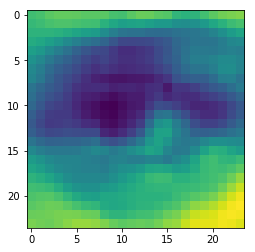

1


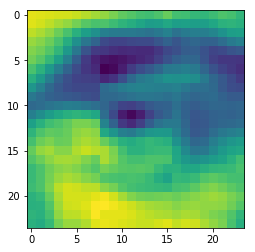

1


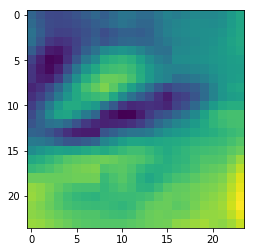

0


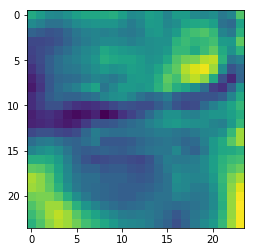

0


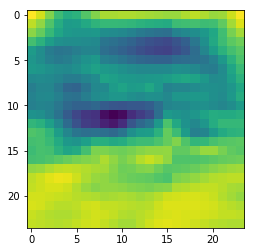

1


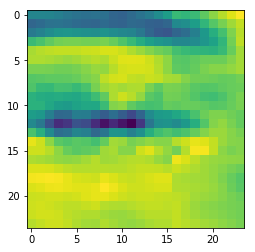

0


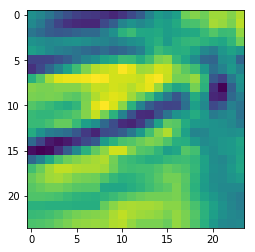

0


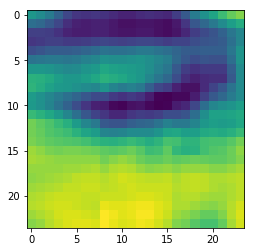

0


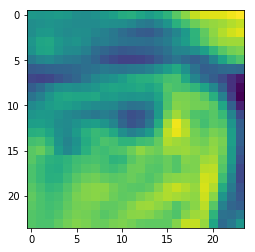

1


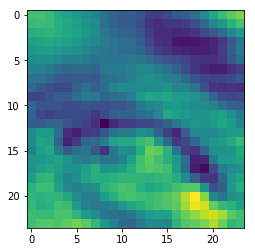

1


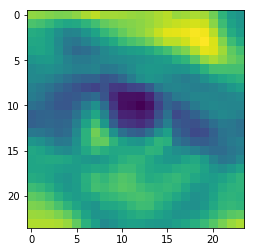

1


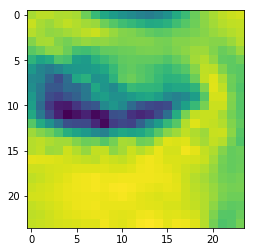

0


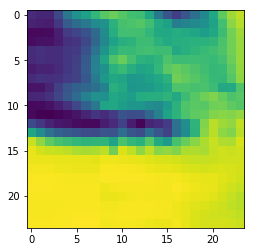

0


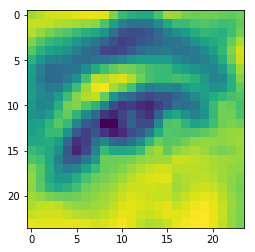

1


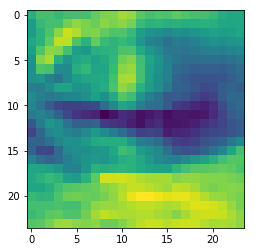

0


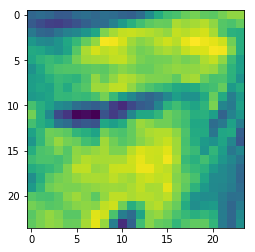

0


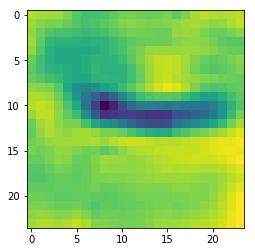

0


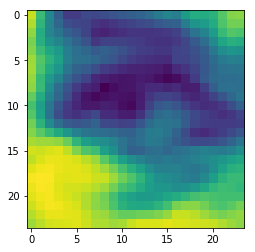

1


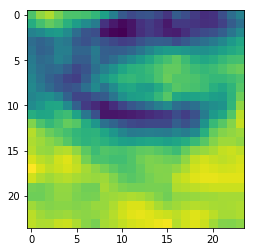

0


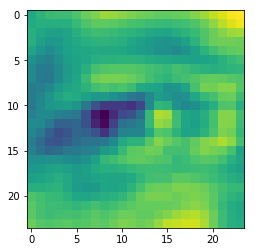

1


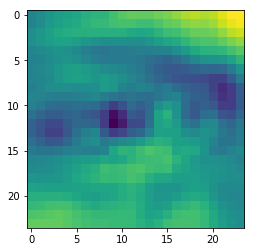

1


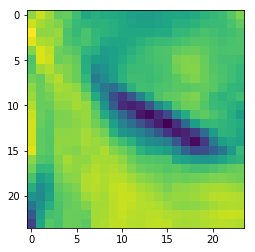

0


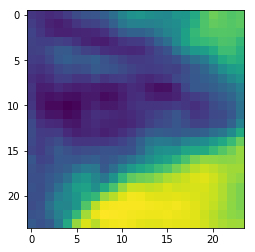

1


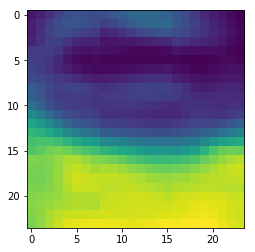

0


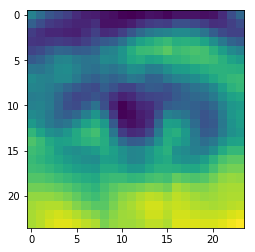

1


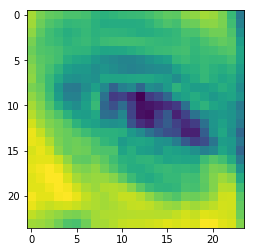

1


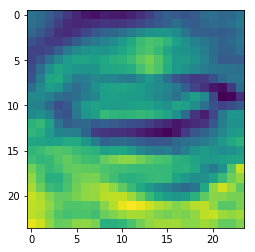

0


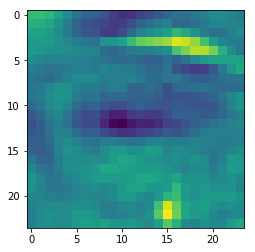

0


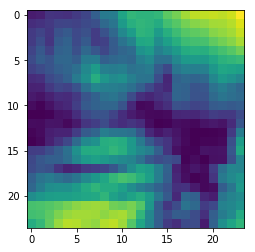

0


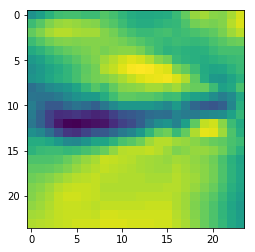

0


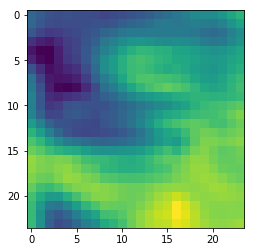

0


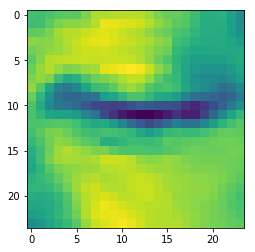

0


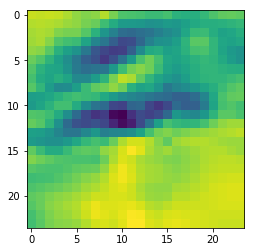

1


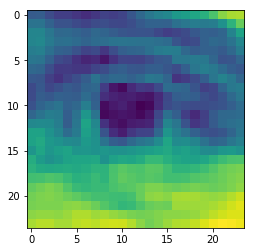

1


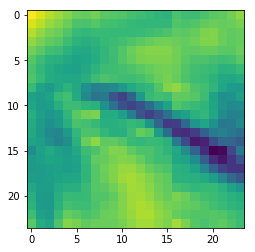

0


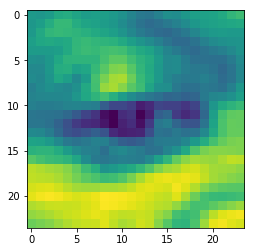

1


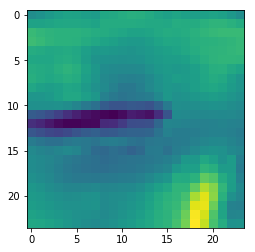

0


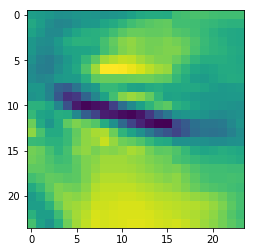

0


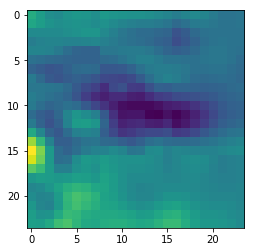

0


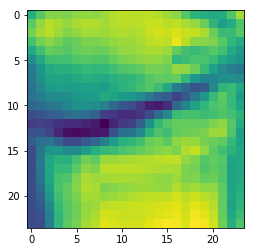

0


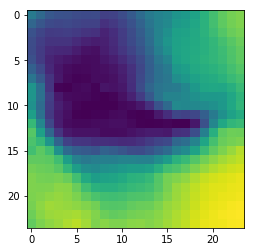

0


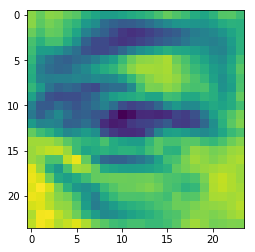

1


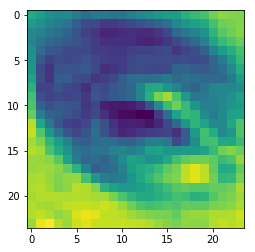

1


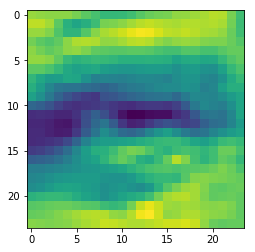

1


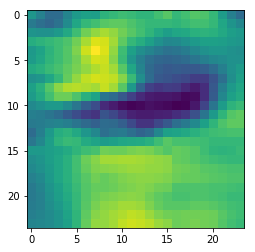

0


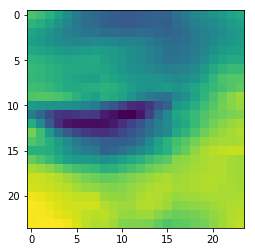

0


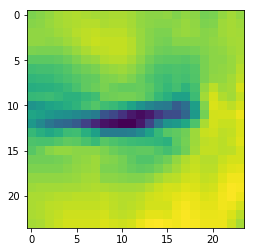

0


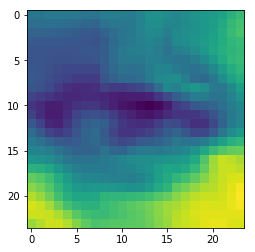

1


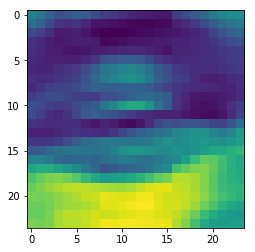

0


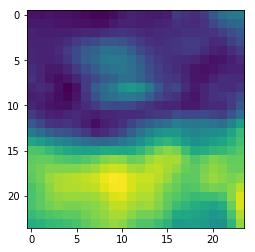

0


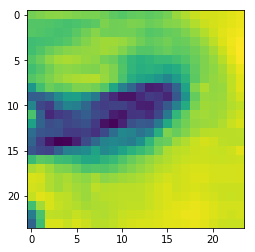

0


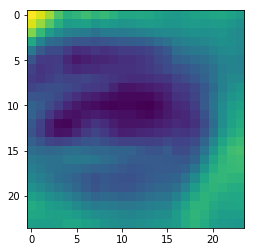

1


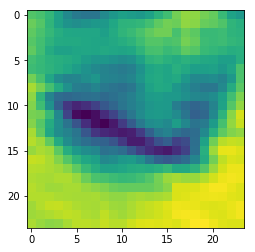

0


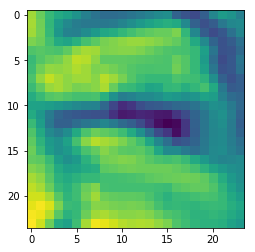

0


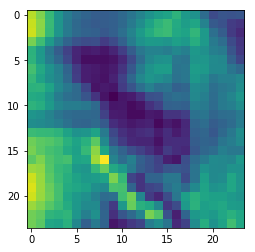

0


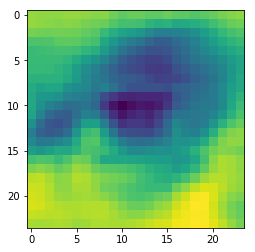

1


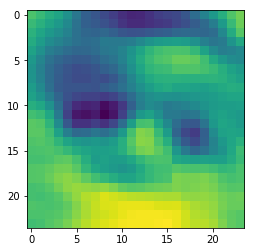

1


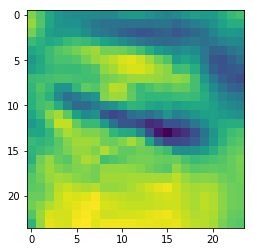

0


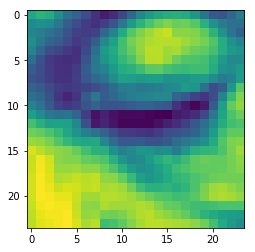

0


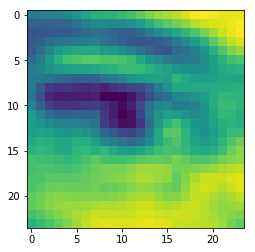

1


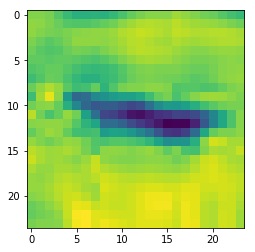

0


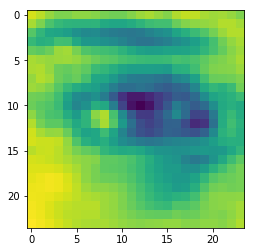

1


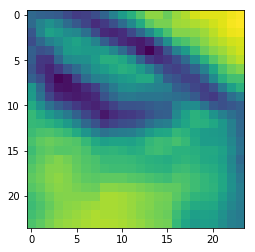

0


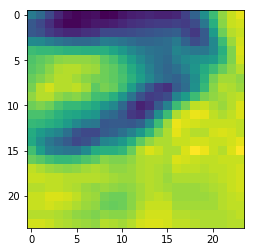

0


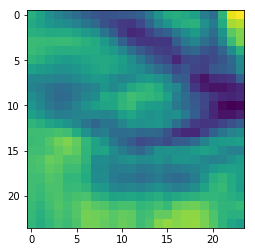

0


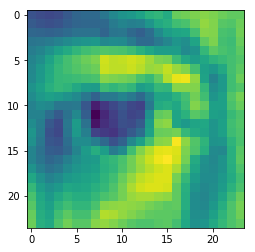

1


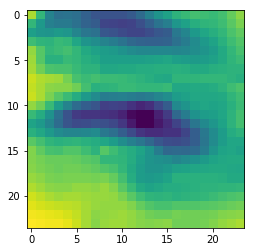

1


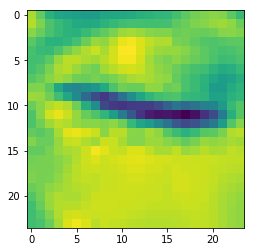

0


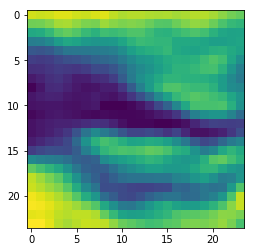

1


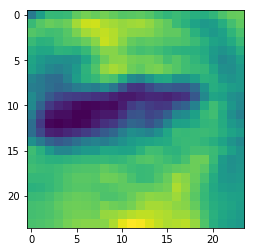

0


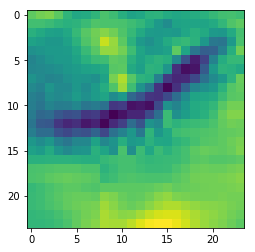

0


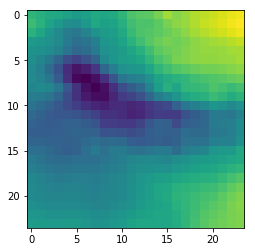

0


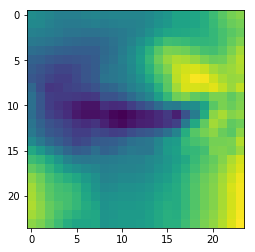

0


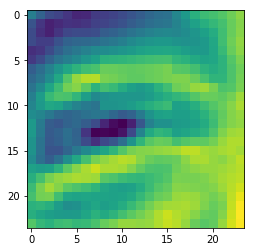

1


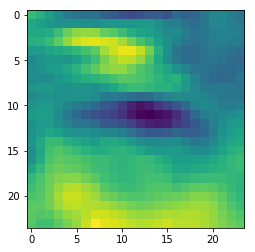

1


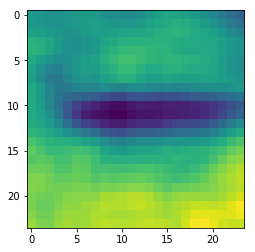

0


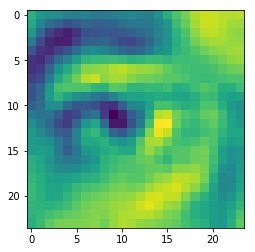

1


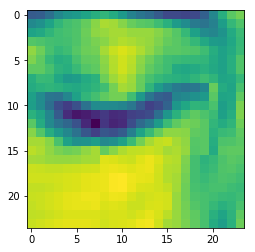

0


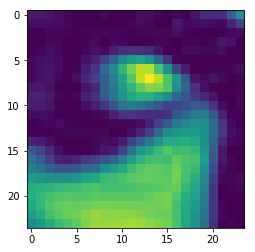

0


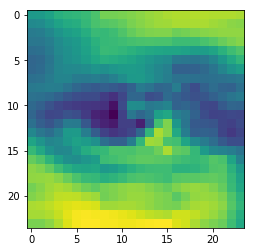

1


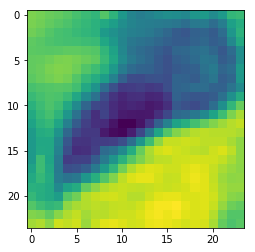

1


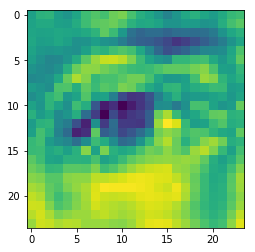

1


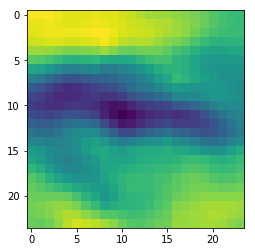

1


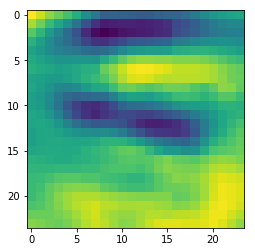

0


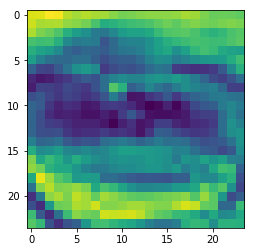

1


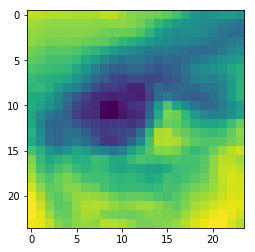

1


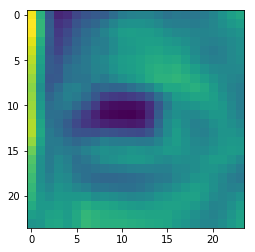

1


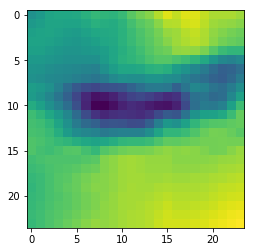

0


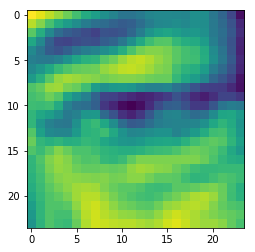

1


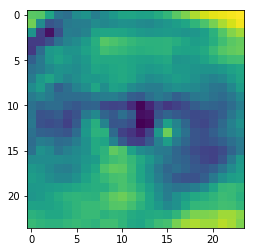

1


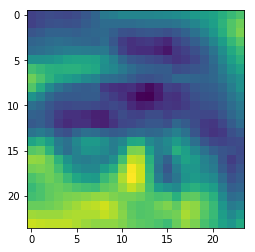

1


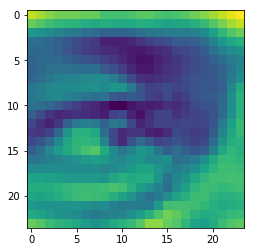

1


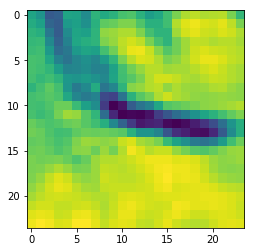

0


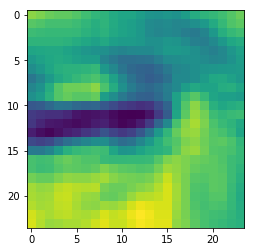

0


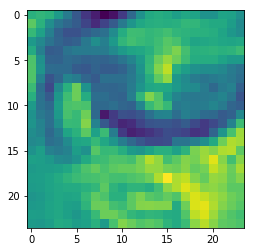

0


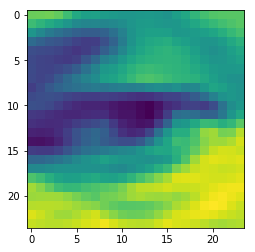

1


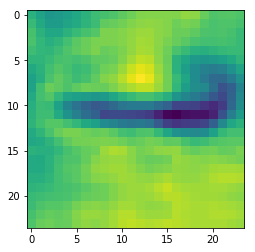

0


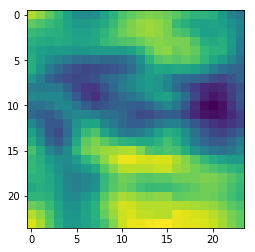

0


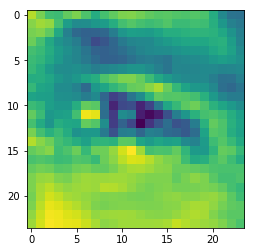

1


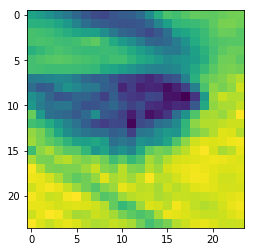

0


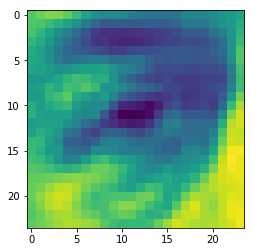

1


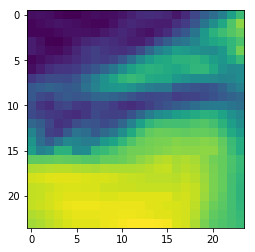

0


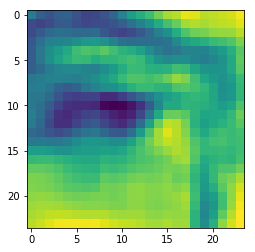

1


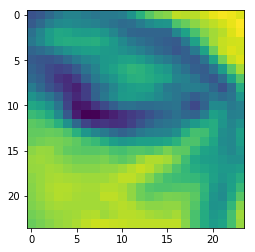

0


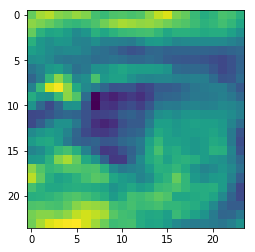

1


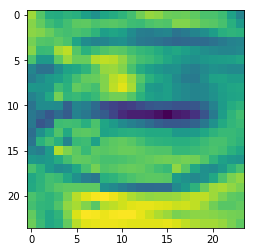

0


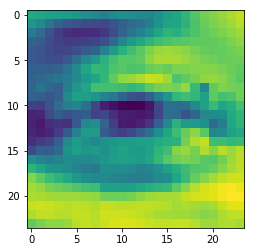

1


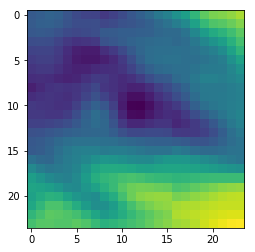

1


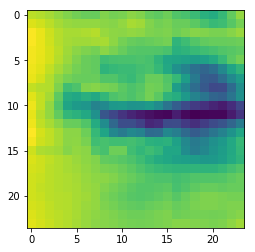

0


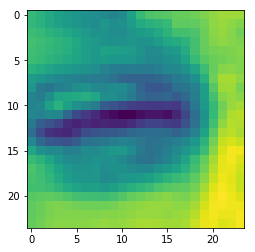

0


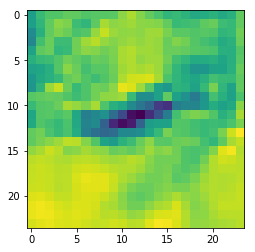

0


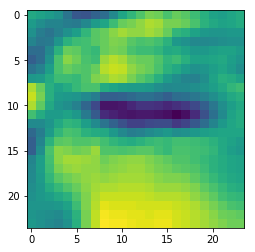

0


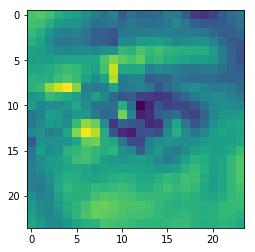

1


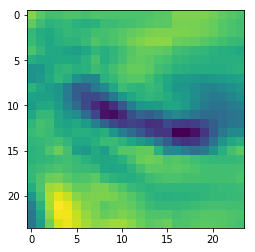

0


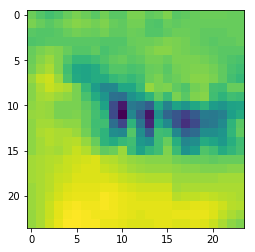

0


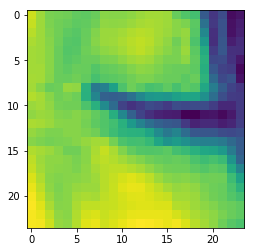

0


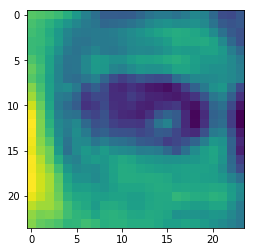

1


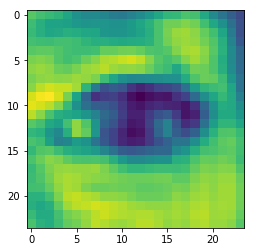

1


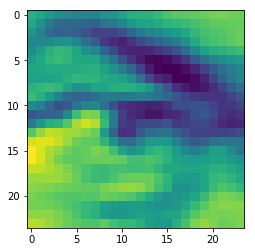

1


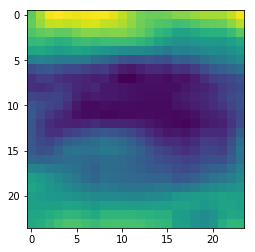

1


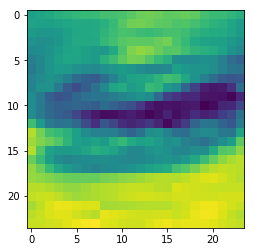

0


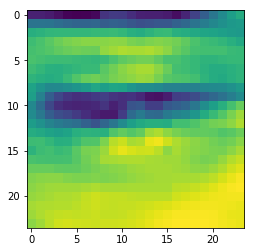

0


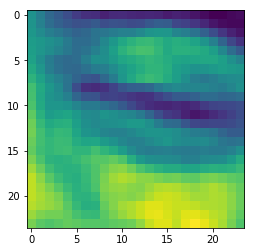

0


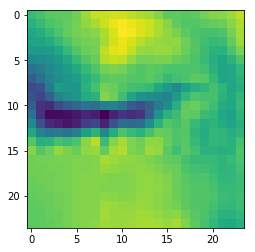

0


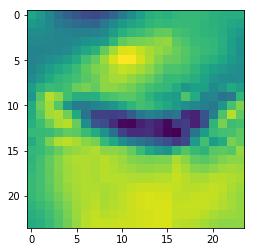

0


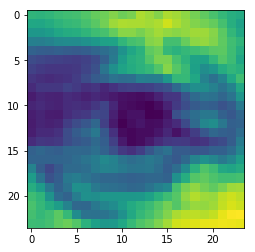

1


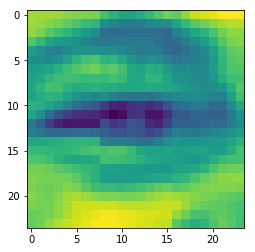

1


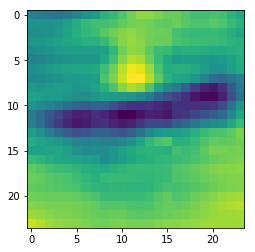

0


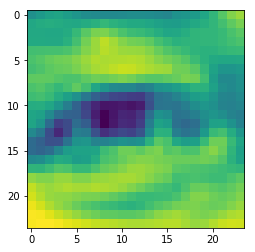

1


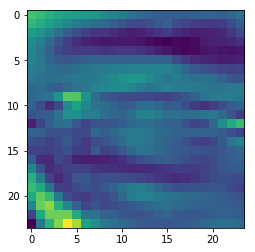

0


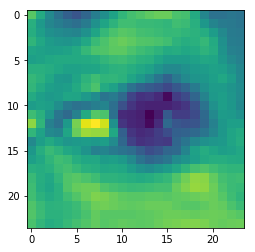

1


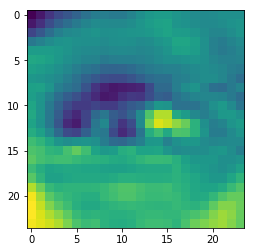

1


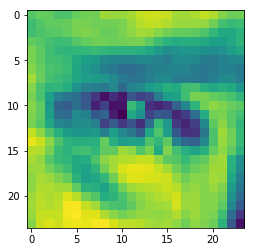

1


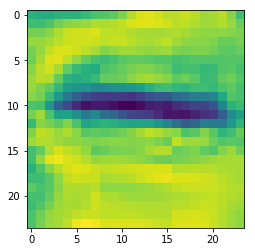

0


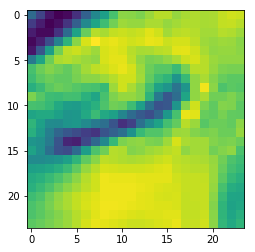

0


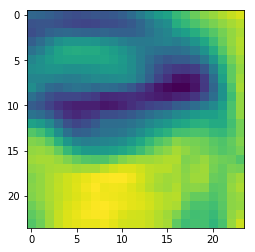

0


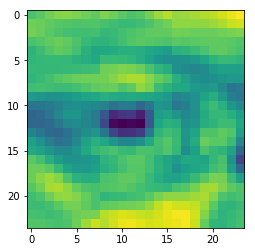

1


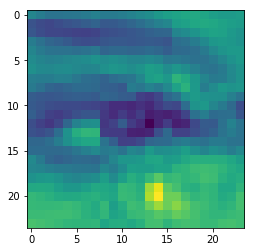

1


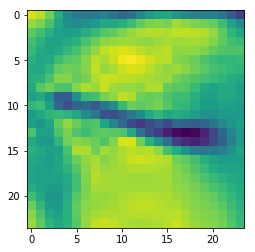

0


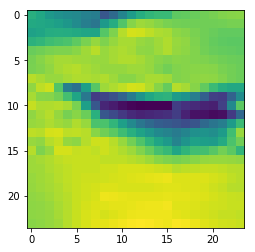

0


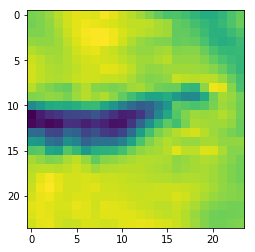

0


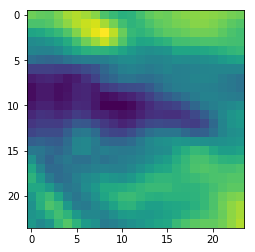

1


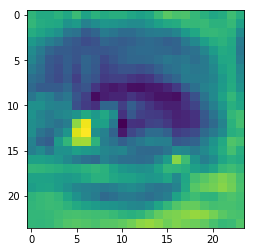

1


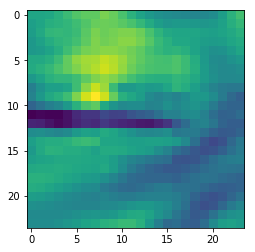

0


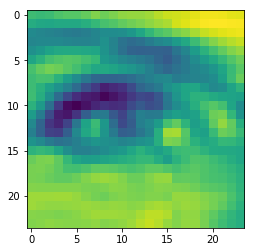

1


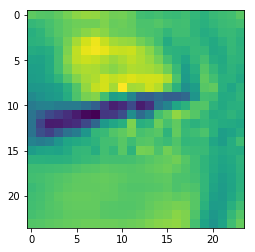

0


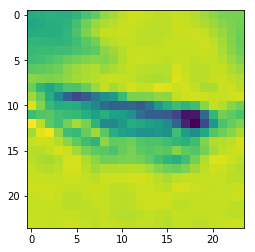

0


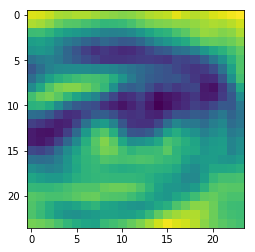

1


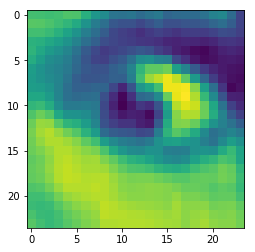

1


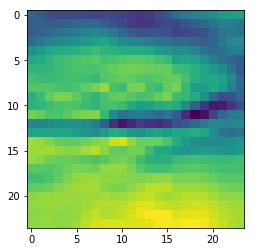

0


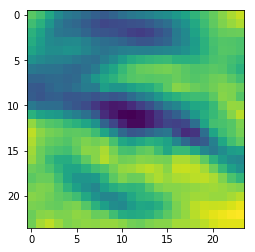

1


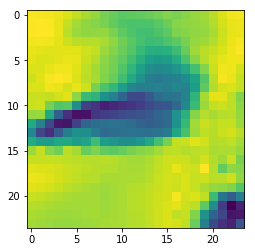

0


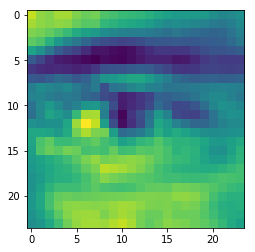

1


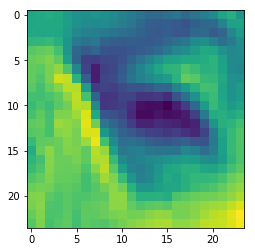

1


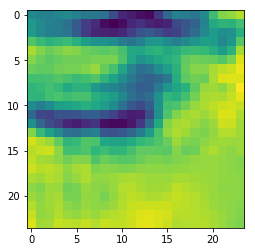

0


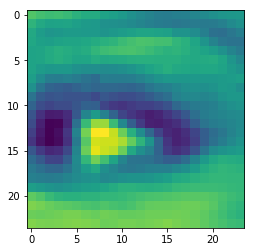

1


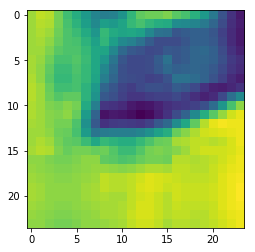

0


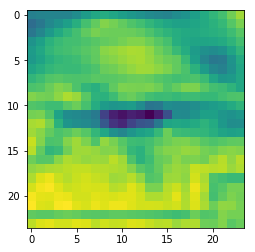

0


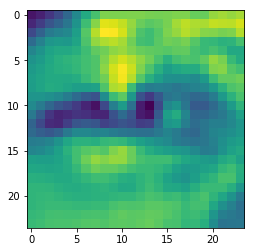

1


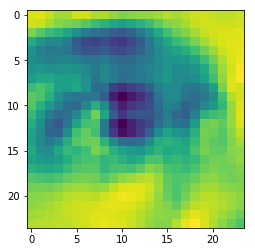

1


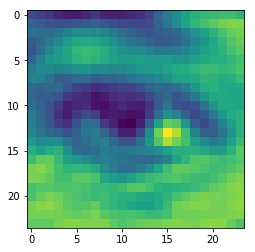

1


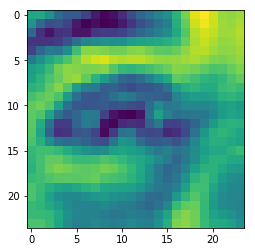

1


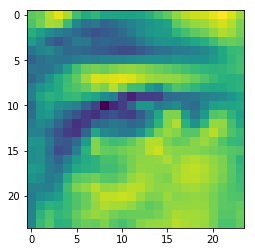

1


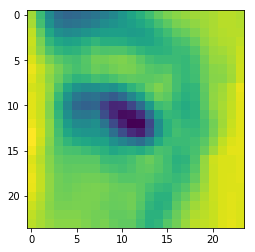

1


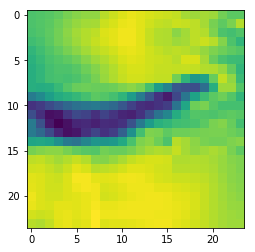

0


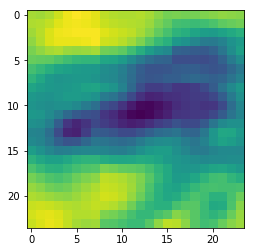

1


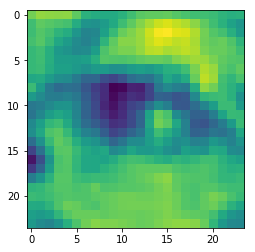

1


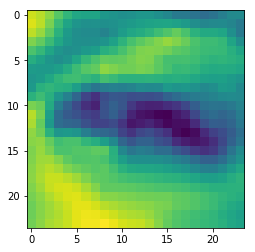

1


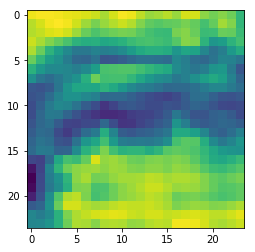

1


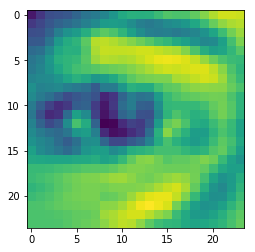

1


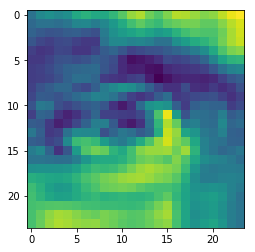

1


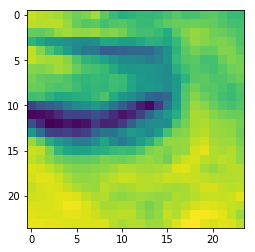

0


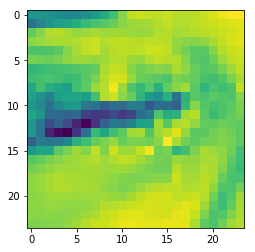

0


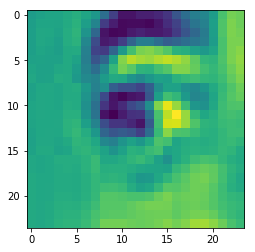

1


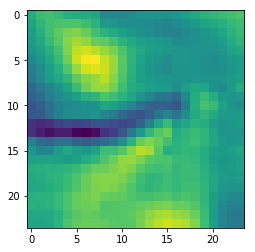

0


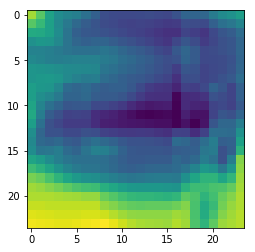

0


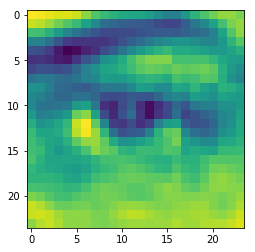

1


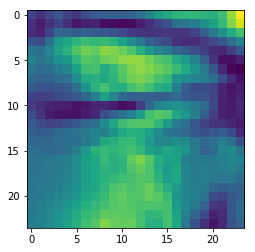

0


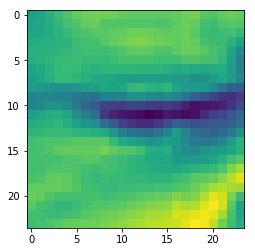

0


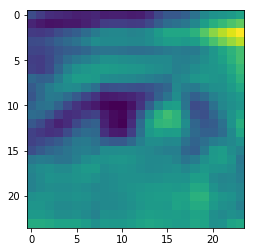

1


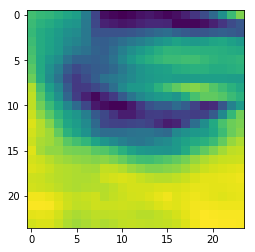

0


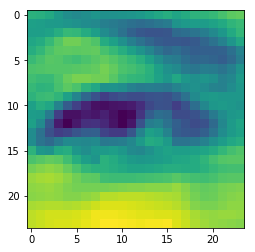

1


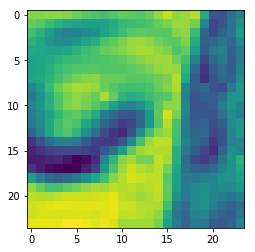

0


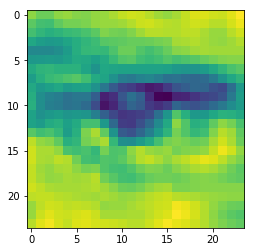

1


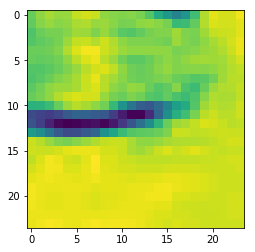

0


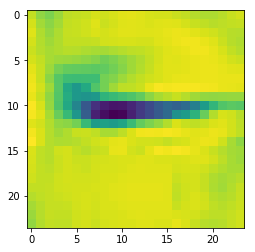

0


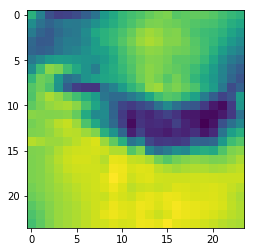

0


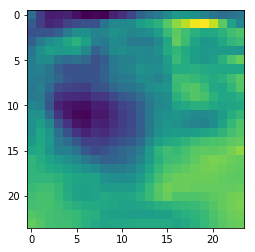

0


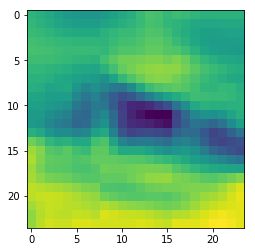

1


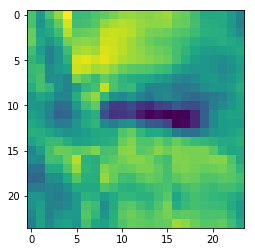

0


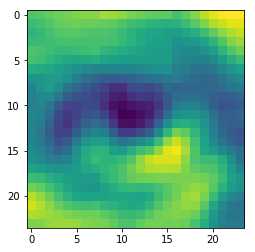

1


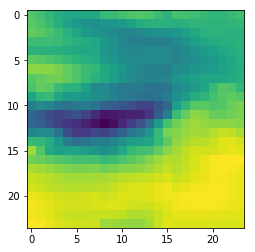

0


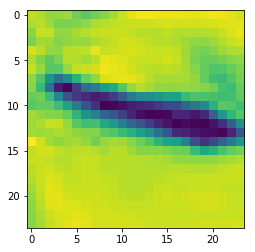

0


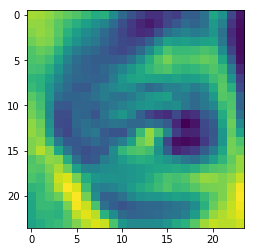

1


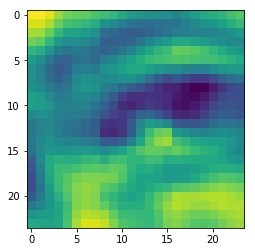

1


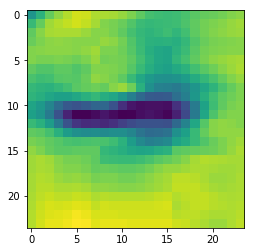

0


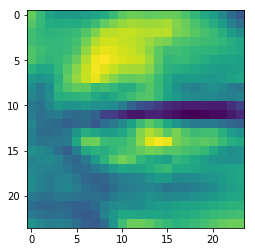

0


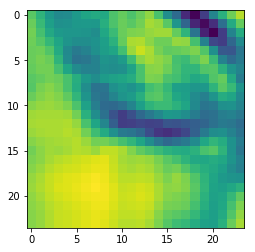

0


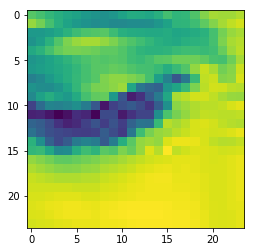

0


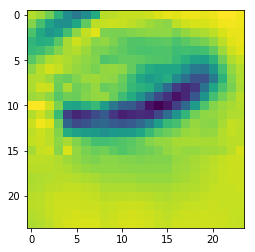

0


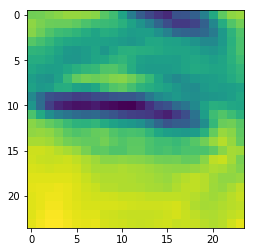

0


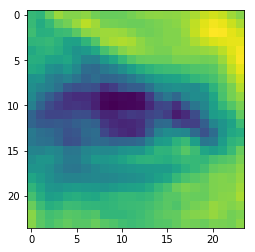

1


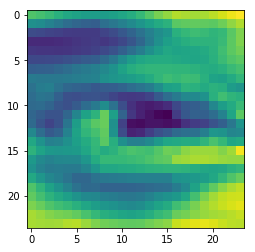

1


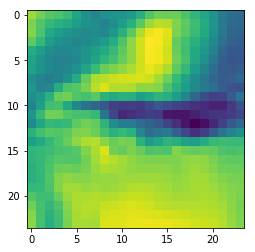

0


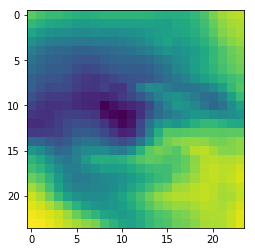

1


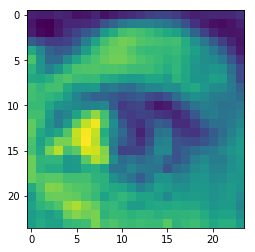

1


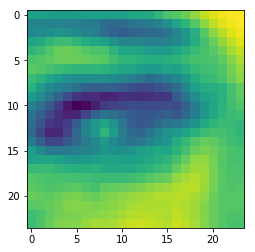

1


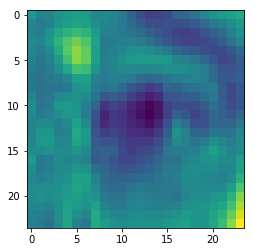

1


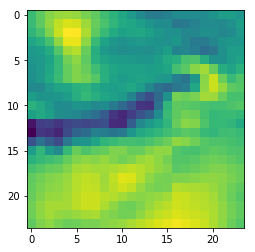

0


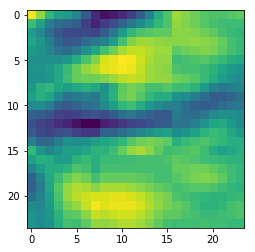

0


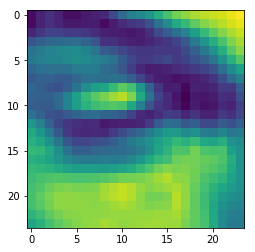

1


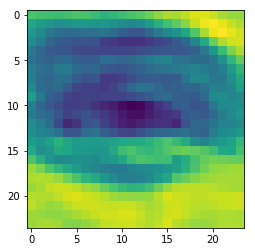

1


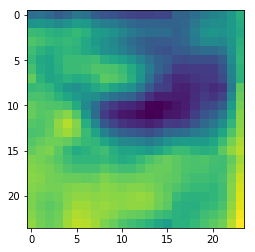

0


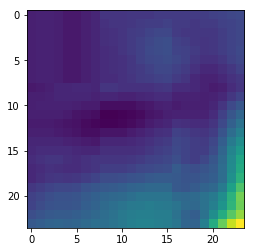

0


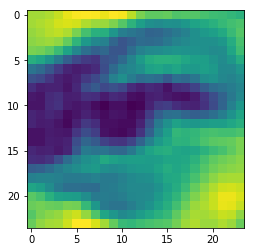

1


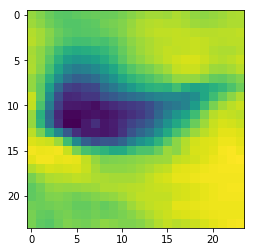

0


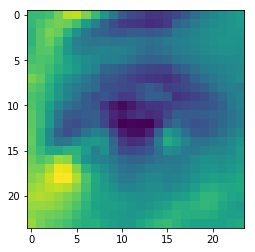

1


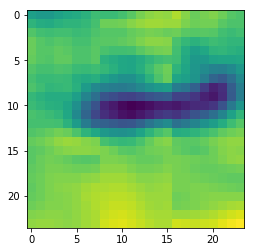

0


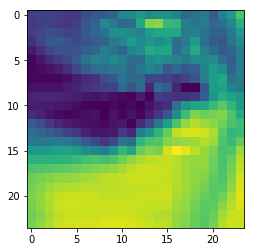

0


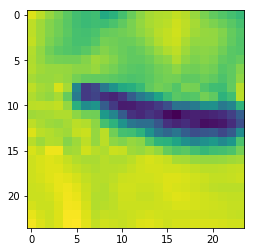

0


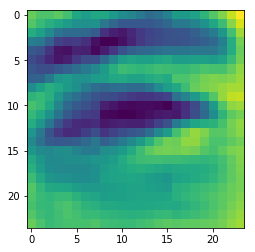

1


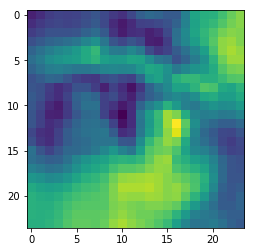

1


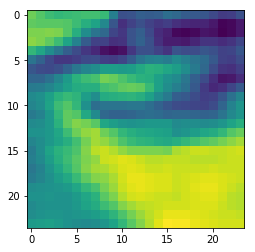

0


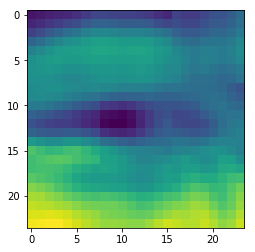

1


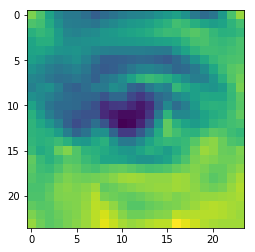

1


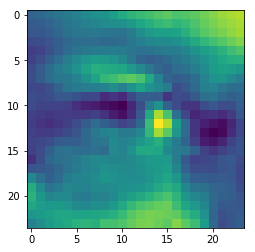

1


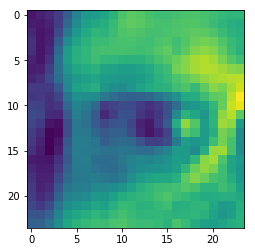

1


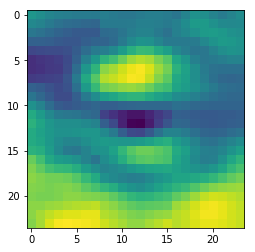

1


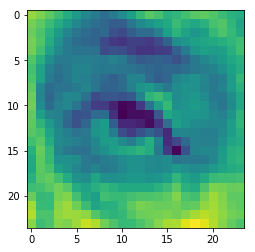

1


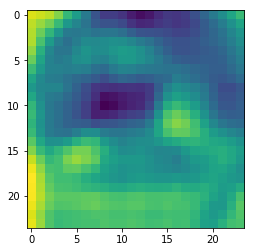

1


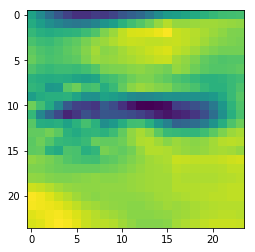

0


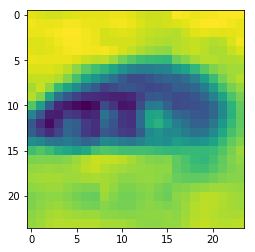

1


KeyboardInterrupt: 

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
for i in range(len(x_test)):
    plt.imshow(x_test[i].reshape((24,24)))
    plt.show()
    
    print(y_test[i])

## CNN

In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import SeparableConv2D
from keras.utils import np_utils
from keras.layers import Activation

print (x_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[0])

In [7]:
X_train = x_train.reshape(x_train.shape[0], 24, 24,1)
X_test = x_test.reshape(x_test.shape[0], 24, 24,1)

In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape)

(3880, 24, 24, 1)


In [9]:
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

In [10]:
Y_test[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [11]:
Y_train[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Model 3

In [67]:
from keras.layers import *
model = Sequential()
"""
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(24,24,1)))
model.add(BatchNormalization())
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, 3, 3, activation='relu', input_shape=(24,24,1)))
model.add(Conv2D(8,1,activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(32, 3, 3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization()) 
model.add(Conv2D(32, 3, 3, activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
"""
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(24,24,1)))
model.add(BatchNormalization())
model.add(Conv2D(10,1,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, 3, activation='relu', input_shape=(24,24,1)))
model.add(BatchNormalization())
model.add(Conv2D(10,1,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, 3, 3, activation='relu', input_shape=(24,24,1)))
model.add(BatchNormalization())
model.add(Conv2D(10,1,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalMaxPooling2D())
model.add(Dense(2, activation = 'softmax'))

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 22, 22, 32)        320       
_________________________________________________________________
batch_normalization_34 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 22, 22, 10)        330       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 11, 11, 10)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 9, 9, 64)          5824      
_________________________________________________________________
batch_normalization_35 (Batc (None, 9, 9, 64)          256       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 9, 9, 10)          650       
__________

In [69]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Aug2

In [70]:
datagen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=270,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range =0.2
    
)

#datagen.fit(X_train)

In [71]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),
                    steps_per_epoch=len(X_train) / 128, epochs=30,validation_data=(X_test, Y_test))

Epoch 1/30
31/30 [==============================] - 29s 926ms/step - loss: 0.6943 - acc: 0.6508 - val_loss: 0.9977 - val_acc: 0.5959
Epoch 2/30
31/30 [==============================] - 26s 855ms/step - loss: 0.5831 - acc: 0.7001 - val_loss: 0.6507 - val_acc: 0.6639
Epoch 3/30
31/30 [==============================] - 26s 835ms/step - loss: 0.5204 - acc: 0.7404 - val_loss: 0.5569 - val_acc: 0.7041
Epoch 4/30
31/30 [==============================] - 27s 871ms/step - loss: 0.4917 - acc: 0.7709 - val_loss: 0.9326 - val_acc: 0.6093
Epoch 5/30
31/30 [==============================] - 28s 902ms/step - loss: 0.4452 - acc: 0.7921 - val_loss: 0.4922 - val_acc: 0.7732
Epoch 6/30
31/30 [==============================] - 28s 893ms/step - loss: 0.4189 - acc: 0.8040 - val_loss: 0.6069 - val_acc: 0.7619
Epoch 7/30
31/30 [==============================] - 30s 959ms/step - loss: 0.3814 - acc: 0.8308 - val_loss: 0.6688 - val_acc: 0.7402
Epoch 8/30
31/30 [==============================] - 28s 903ms/step - 

KeyboardInterrupt: 

In [59]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                    steps_per_epoch=len(X_train) / 32, epochs=10,validation_data=(X_test, Y_test))

Epoch 1/10
122/121 [==============================] - 15s 123ms/step - loss: 0.1883 - acc: 0.9201 - val_loss: 0.1793 - val_acc: 0.9320
Epoch 2/10
122/121 [==============================] - 19s 154ms/step - loss: 0.1879 - acc: 0.9275 - val_loss: 0.1806 - val_acc: 0.9320
Epoch 3/10
122/121 [==============================] - 16s 127ms/step - loss: 0.1840 - acc: 0.9244 - val_loss: 0.2086 - val_acc: 0.9186
Epoch 4/10
122/121 [==============================] - 18s 145ms/step - loss: 0.1852 - acc: 0.9255 - val_loss: 0.1582 - val_acc: 0.9392
Epoch 5/10
122/121 [==============================] - 15s 126ms/step - loss: 0.1799 - acc: 0.9278 - val_loss: 0.1770 - val_acc: 0.9299
Epoch 6/10
122/121 [==============================] - 16s 131ms/step - loss: 0.1727 - acc: 0.9303 - val_loss: 0.1966 - val_acc: 0.9206
Epoch 7/10
122/121 [==============================] - 18s 146ms/step - loss: 0.1757 - acc: 0.9321 - val_loss: 0.2220 - val_acc: 0.9155
Epoch 8/10
122/121 [==============================] - 1

In [388]:
## Only for Testing

In [33]:
from keras.models import load_model
m = load_model('model_aug1.hdf5')

In [38]:
path = os.path.expanduser("~/Downloads/Downloads/Identy_Eye/Ravi2/open")
#path = os.path.expanduser("~/Downloads/Downloads/Identy_Eye/dataset_B_Eye_Images/openRightEyes")

imgs_left = os.listdir(path)
x = []
for item in imgs_left:
    im = os.path.join(path,item)
    x.append(cv2.imread(im,0))


images = np.zeros((len(x), 24, 24))
img = []
for i in range(len(x)):
    images[i, :, :] = x[i]
    img.append(np.reshape(images[i], 24*24))

import pandas as pd
df = pd.DataFrame(img)
#print(df.head())
df.fillna(df.median(),inplace = True)
#print(df.shape)

x = df.values.reshape(len(x),24,24,1)
x = x.astype('float32')
x = x/255
#x = x.expand_dims(x,axis=3)
print(x.shape)

(387, 24, 24, 1)


In [39]:
p = m.predict(x)
print(p)

[[0.60485584 0.39514413]
 [0.5431648  0.4568352 ]
 [0.6927211  0.3072789 ]
 [0.77322614 0.2267739 ]
 [0.7232856  0.27671438]
 [0.6484305  0.35156953]
 [0.63696504 0.3630349 ]
 [0.68176997 0.31823   ]
 [0.69299996 0.30700004]
 [0.74692667 0.25307336]
 [0.8647551  0.13524485]
 [0.9620387  0.03796128]
 [0.64870924 0.35129073]
 [0.6640349  0.33596507]
 [0.8278284  0.17217155]
 [0.7443726  0.25562742]
 [0.6281769  0.37182307]
 [0.6528455  0.34715453]
 [0.72357154 0.2764284 ]
 [0.82214254 0.17785743]
 [0.71286684 0.2871332 ]
 [0.6405544  0.35944557]
 [0.70422864 0.29577142]
 [0.56024444 0.43975556]
 [0.66448754 0.33551246]
 [0.49376354 0.50623643]
 [0.63142276 0.36857727]
 [0.7078244  0.29217562]
 [0.56044966 0.43955037]
 [0.65542287 0.34457716]
 [0.74546385 0.25453618]
 [0.6160284  0.3839716 ]
 [0.6473683  0.3526317 ]
 [0.7830643  0.2169356 ]
 [0.67869645 0.32130355]
 [0.6988217  0.30117828]
 [0.66039544 0.33960453]
 [0.6655185  0.33448145]
 [0.69135576 0.30864426]
 [0.76789784 0.23210219]


In [41]:
max(p[:,1])

0.9590781

In [47]:
c=0
for x in p:
    if(x[1]<0.2):
        c+=1
        print(x)
print(c)

[0.8647551  0.13524485]
[0.9620387  0.03796128]
[0.8278284  0.17217155]
[0.82214254 0.17785743]
[0.85318613 0.14681384]
[0.8703248  0.12967518]
[0.8322193  0.16778077]
[0.8063931  0.19360696]
[0.80471075 0.19528928]
[0.80287385 0.19712614]
[0.8121028  0.18789718]
[0.88668877 0.11331119]
[0.88729614 0.11270387]
[0.84747434 0.15252563]
[0.83399105 0.16600893]
[0.816207   0.18379307]
[0.88103914 0.11896087]
[0.87370265 0.12629738]
[0.82482046 0.17517954]
[0.8339769  0.16602308]
[0.8036251  0.19637485]
[0.8196991  0.18030092]
[0.8184549 0.1815451]
[0.8225001 0.1774999]
24


In [3]:
from keras.layers import *
model = Sequential()

model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(128,128,1)))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Conv2D(32,3,3,activation='relu'))

model.add(GlobalMaxPooling2D())
model.add(Dense(2, activation = 'softmax'))

C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128,...)`
  after removing the cwd from sys.path.
C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """
C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  import sys
C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
C:\Users\Ravi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 120, 120, 32)      9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 118, 118, 32)      9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 116, 116, 32)      9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 114, 114, 32)      9248      
__________